# CIBMTR - Equity in post-HCT Survival Predictions
* Improve prediction of transplant survival rates equitably for allogeneic HCT patients
* Domain: Survival Analysis + Regression
* (Research Competition)

In [ ]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_dict = pd.read_csv('data_dictionary.csv')
df_train

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,28795,Intermediate - TED AML case <missing cytogenetics,NaN,Favorable,No,2.0,8.0,No TBI,No,6.0,...,Bi-directional non-permissive,NaN,"N/A, Mel not given",8.0,NaN,2.0,No,10.0,0.0,18.633
28796,28796,High,No,Poor,Yes,1.0,4.0,No TBI,No,5.0,...,GvH non-permissive,Related,"N/A, Mel not given",6.0,Yes,1.0,Yes,8.0,1.0,4.892
28797,28797,TBD cytogenetics,NaN,Poor,NaN,2.0,8.0,No TBI,NaN,6.0,...,GvH non-permissive,Unrelated,"N/A, Mel not given",8.0,NaN,2.0,No,10.0,0.0,23.157
28798,28798,N/A - non-malignant indication,No,Poor,No,1.0,4.0,No TBI,No,3.0,...,Permissive mismatched,Related,MEL,4.0,No,1.0,No,5.0,0.0,52.351


In [ ]:
df_dict

,variable,description,type,values
0,dri_score,Refined disease risk index,Categorical,['Intermediate' 'High' 'N/A - non-malignant in...
1,psych_disturb,Psychiatric disturbance,Categorical,['Yes' 'No' nan 'Not done']
2,cyto_score,Cytogenetic score,Categorical,['Intermediate' 'Favorable' 'Poor' 'TBD' nan '...
3,diabetes,Diabetes,Categorical,['No' 'Yes' nan 'Not done']
4,hla_match_c_high,Recipient / 1st donor allele level (high resol...,Numerical,NaN
5,hla_high_res_8,Recipient / 1st donor allele-level (high resol...,Numerical,NaN
6,tbi_status,TBI,Categorical,"['No TBI' 'TBI + Cy +- Other' 'TBI +- Other, <..."
7,arrhythmia,Arrhythmia,Categorical,['No' nan 'Yes' 'Not done']
8,hla_low_res_6,Recipient / 1st donor antigen-level (low resol...,Numerical,NaN
9,graft_type,Graft type,Categorical,['Peripheral blood' 'Bone marrow']


In [ ]:
# Get the value counts of the 'efs' column
df_train['efs'].value_counts()

# This mapping is consistent with survival analysis conventions:
# 1 is often used to denote the "ongoing" or censored status.
# 0 is used to denote the occurrence of an event.

# efs = 1:
# - Indicates censoring.
# - The patient did not experience the event of interest during the observation period (event-free survival at the last follow-up).

# efs = 0:
# - Indicates the event occurred.
# - The patient experienced the event of interest (e.g., relapse, death, or another predefined event) during the observation period.

,count
efs,
1.0,15532
0.0,13268


# Exploratory Data Analysis (EDA)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

In [ ]:
df_train.describe()

,ID,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,...,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs,efs_time
count,28800.000000,24180.000000,22971.000000,25530.000000,23516.000000,21637.000000,23601.000000,24603.000000,26000.000000,26157.000000,...,28800.000000,26410.000000,24712.00000,28323.000000,27930.00000,25147.000000,25448.000000,23736.000000,28800.000000,28800.000000
mean,14399.500000,1.764516,6.876801,5.143322,5.109202,8.617230,1.736876,5.160346,1.757808,1.715296,...,38.663162,1.709087,1.69962,1.702327,83.83208,6.903448,1.707128,8.664687,0.539306,23.237678
std,8313.988213,0.431941,1.564313,1.207757,1.214162,1.905125,0.447687,1.203240,0.435453,0.451282,...,21.147581,0.458259,0.46518,1.994443,11.02884,1.565017,0.461179,1.882746,0.498461,24.799748
min,0.000000,0.000000,2.000000,2.000000,0.000000,3.000000,0.000000,2.000000,0.000000,1.000000,...,0.044000,0.000000,0.00000,0.000000,40.00000,2.000000,0.000000,4.000000,0.000000,0.333000
25%,7199.750000,2.000000,6.000000,4.000000,4.000000,7.000000,1.000000,4.000000,2.000000,1.000000,...,19.539000,1.000000,1.00000,0.000000,70.00000,6.000000,1.000000,7.000000,0.000000,5.619750
50%,14399.500000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,41.006000,2.000000,2.00000,1.000000,90.00000,8.000000,2.000000,10.000000,1.000000,9.796500
75%,21599.250000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,55.965250,2.000000,2.00000,2.000000,90.00000,8.000000,2.000000,10.000000,1.000000,35.100000
max,28799.000000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,73.726000,2.000000,2.00000,10.000000,100.00000,8.000000,2.000000,10.000000,1.000000,156.819000


### Use Kaplan Meier to compute survival probability/rate (risk value) and then find which predictors affect this survival rate.

In [ ]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 11.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=49bd020493b9307a037ce135088f7f19300576e8a723cb0c0cf9d6be952b2838
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

def transform_survival_probability(df, time_col='efs_time', event_col='efs'):
    kmf = KaplanMeierFitter()
    kmf.fit(df[time_col], df[event_col])
    y = kmf.survival_function_at_times(df[time_col]).values
    return y

# Return the probability of survival at each efs_time, by accounting for efs (Censored data as well)

df_train["y"] = transform_survival_probability(df_train, time_col='efs_time', event_col='efs')
df_train

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time,y
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356,0.458687
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672,0.847759
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793,0.462424
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349,0.456661
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223,0.464674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,28795,Intermediate - TED AML case <missing cytogenetics,NaN,Favorable,No,2.0,8.0,No TBI,No,6.0,...,NaN,"N/A, Mel not given",8.0,NaN,2.0,No,10.0,0.0,18.633,0.462846
28796,28796,High,No,Poor,Yes,1.0,4.0,No TBI,No,5.0,...,Related,"N/A, Mel not given",6.0,Yes,1.0,Yes,8.0,1.0,4.892,0.825494
28797,28797,TBD cytogenetics,NaN,Poor,NaN,2.0,8.0,No TBI,NaN,6.0,...,Unrelated,"N/A, Mel not given",8.0,NaN,2.0,No,10.0,0.0,23.157,0.461142
28798,28798,N/A - non-malignant indication,No,Poor,No,1.0,4.0,No TBI,No,3.0,...,Related,MEL,4.0,No,1.0,No,5.0,0.0,52.351,0.458404


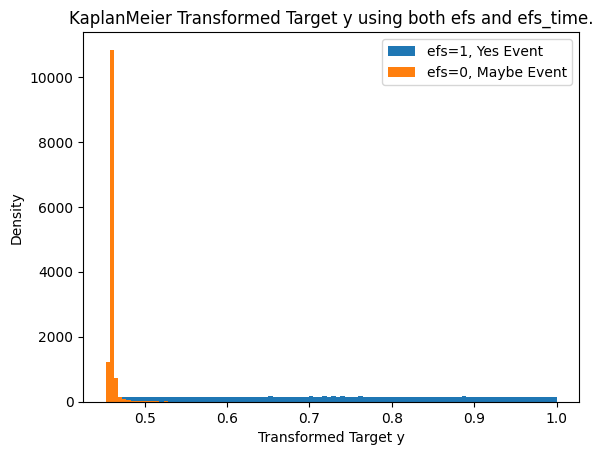

In [ ]:
plt.hist(df_train.loc[df_train.efs==1,"y"],bins=100,label="efs=1, Yes Event")
plt.hist(df_train.loc[df_train.efs==0,"y"],bins=100,label="efs=0, Maybe Event")
plt.xlabel("Transformed Target y")
plt.ylabel("Density")
plt.title("KaplanMeier Transformed Target y using both efs and efs_time.")
plt.legend()
plt.show()

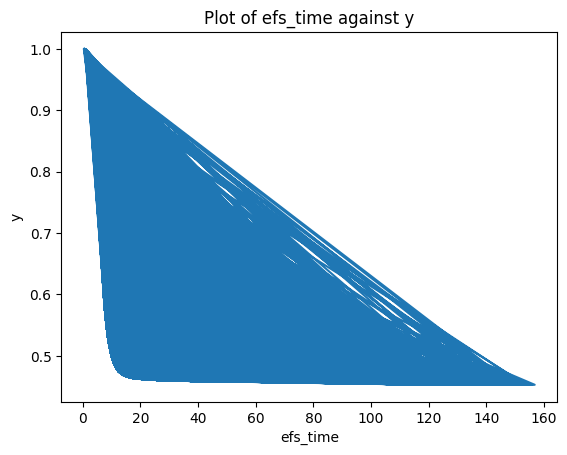

In [ ]:
# prompt: Plot efs_time against y

plt.plot(df_train['efs_time'], df_train['y'])
plt.xlabel('efs_time')
plt.ylabel('y')
plt.title('Plot of efs_time against y')
plt.show()

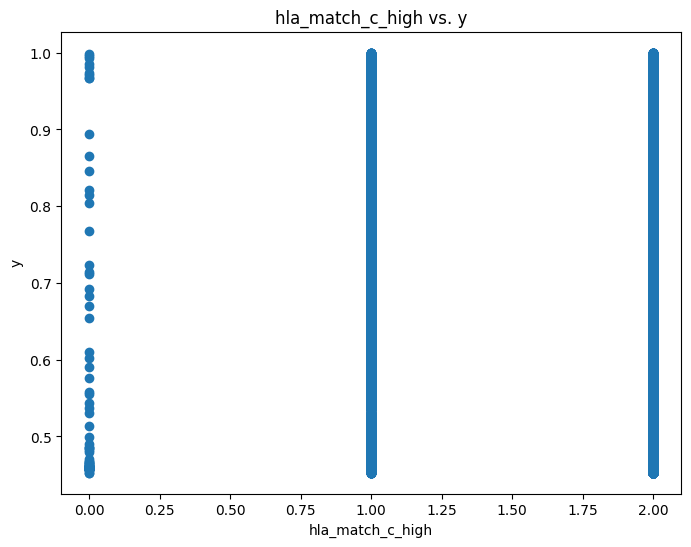

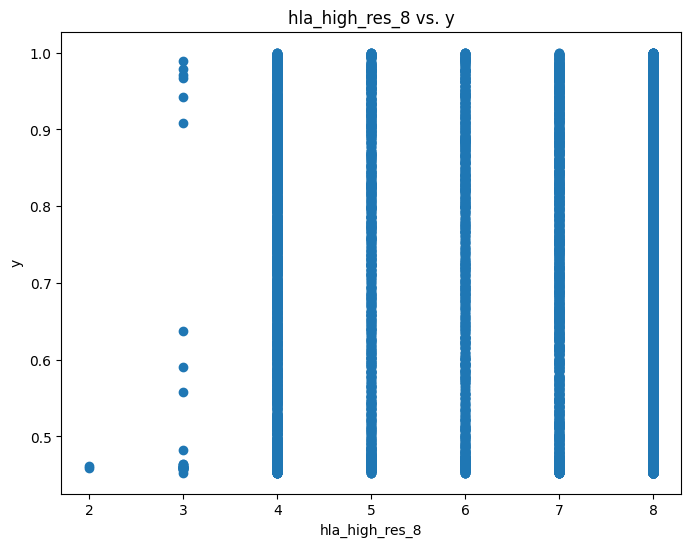

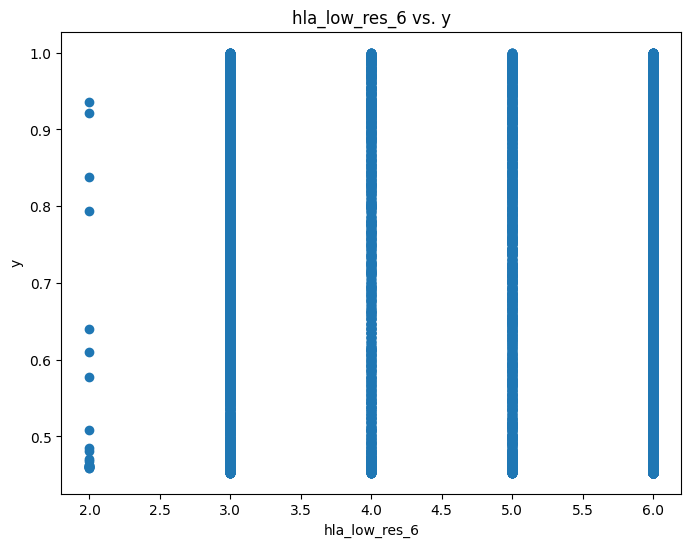

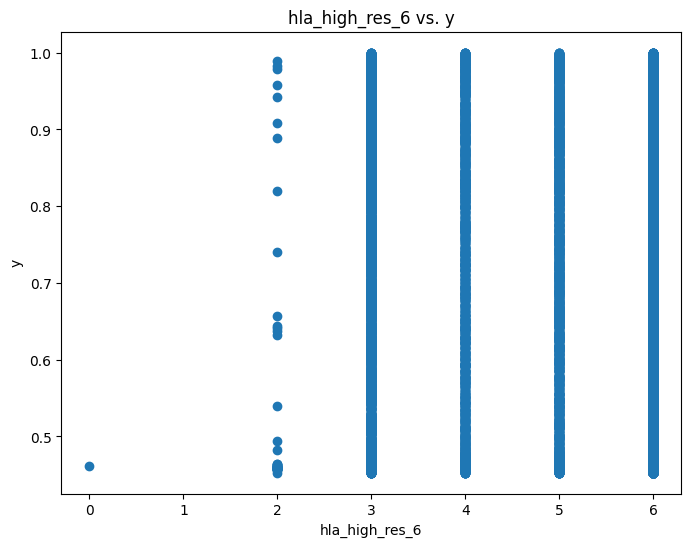

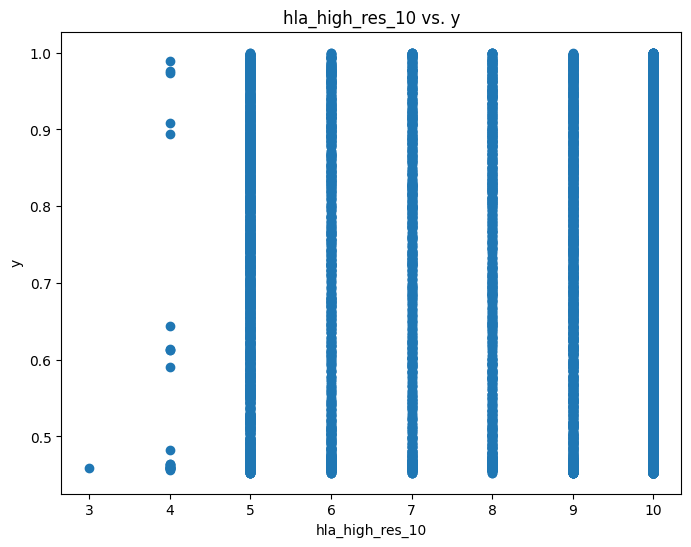

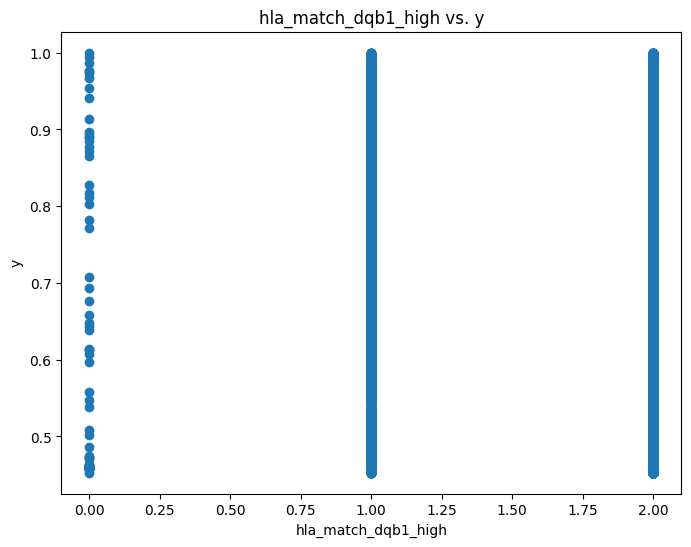

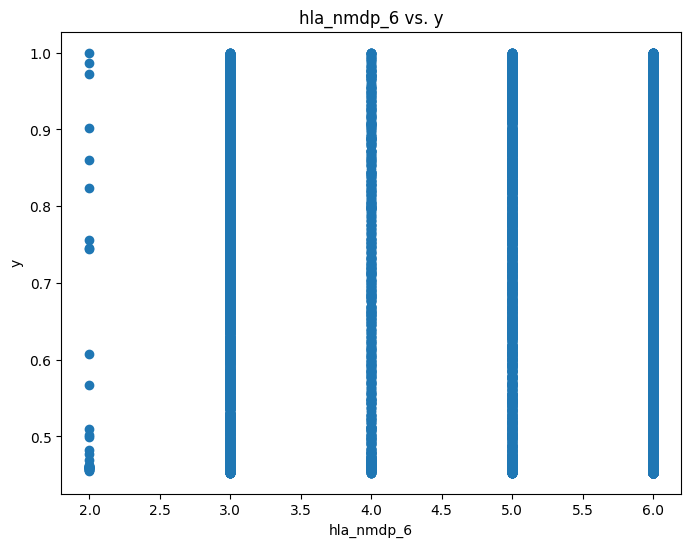

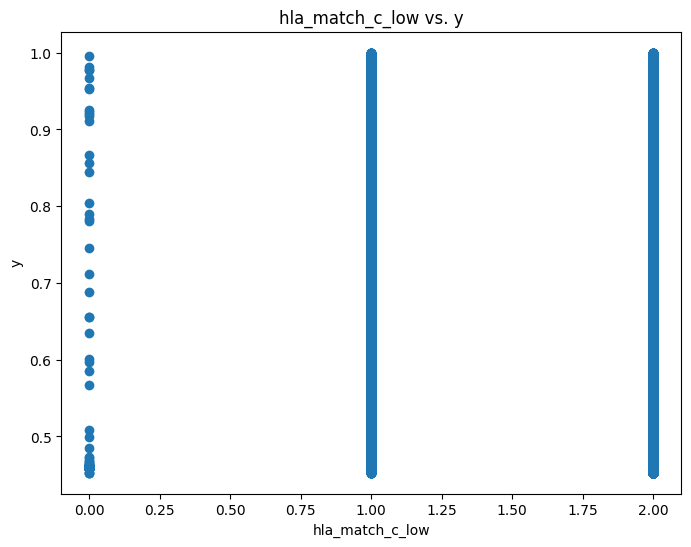

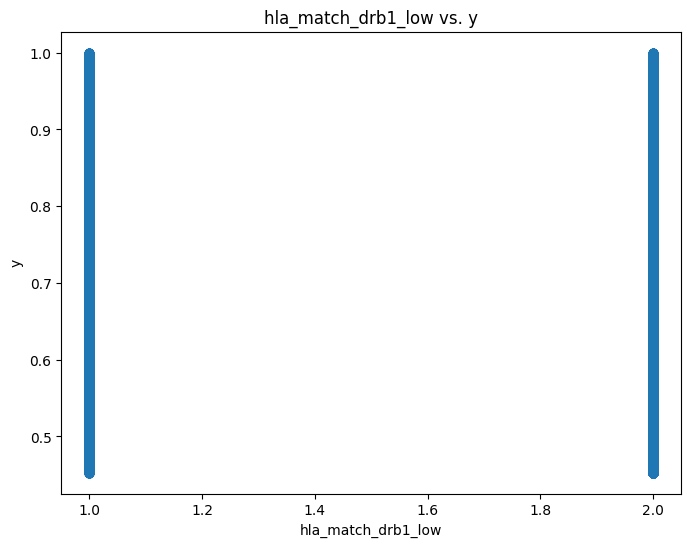

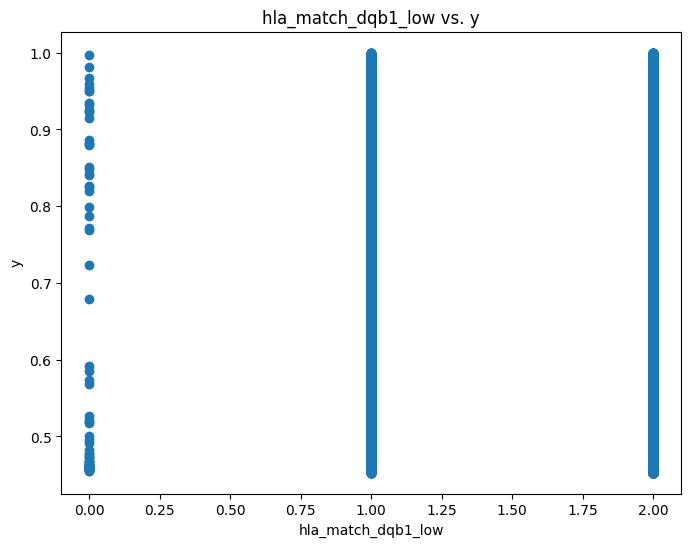

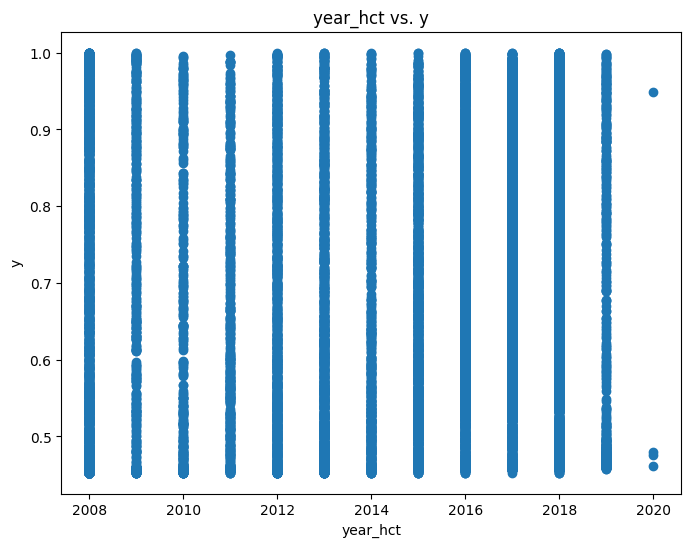

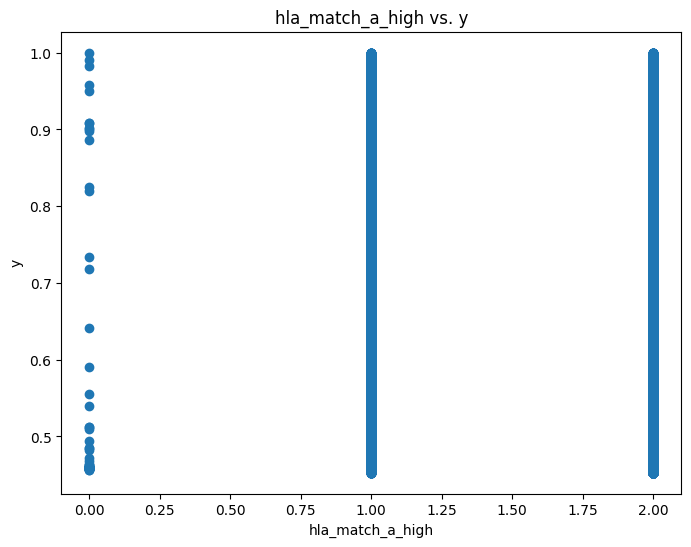

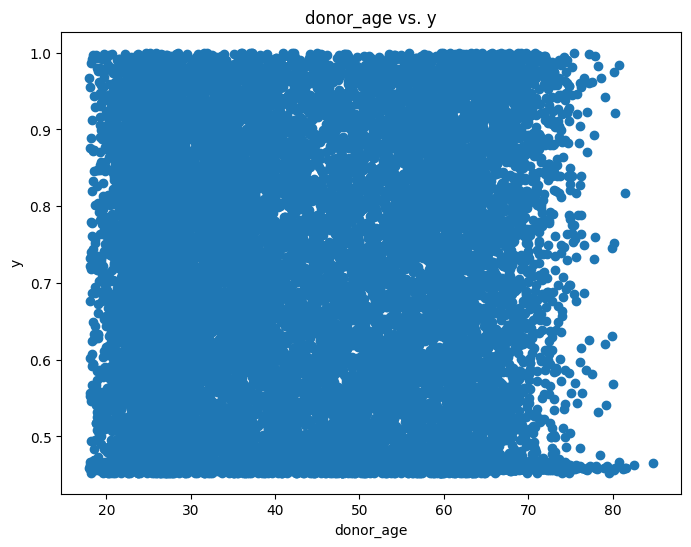

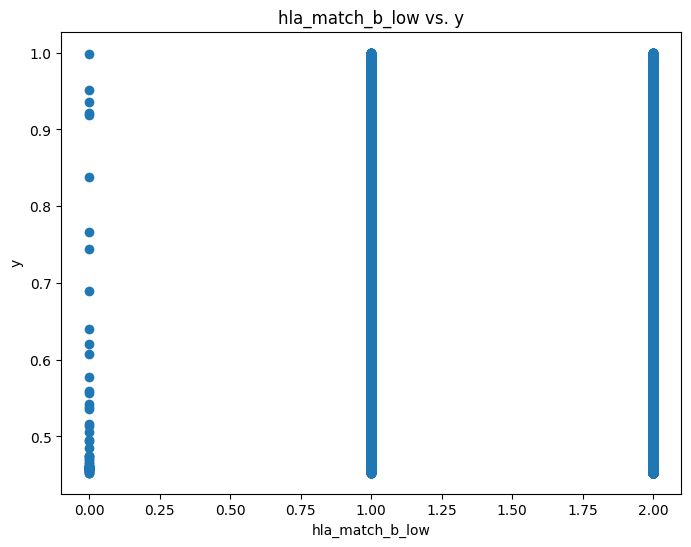

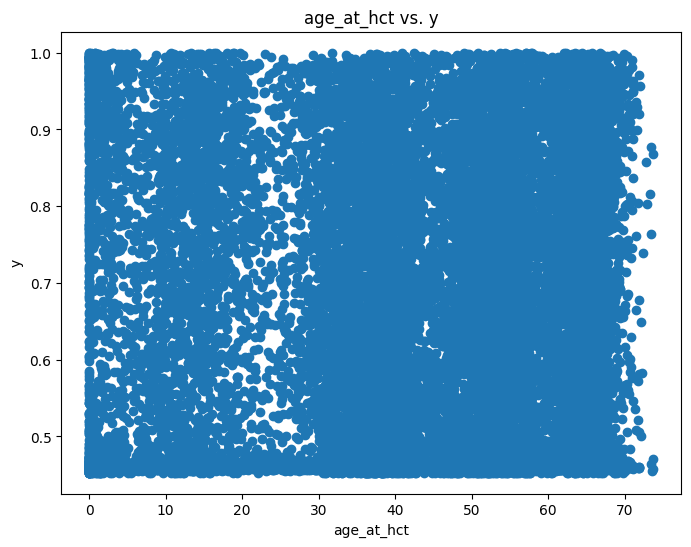

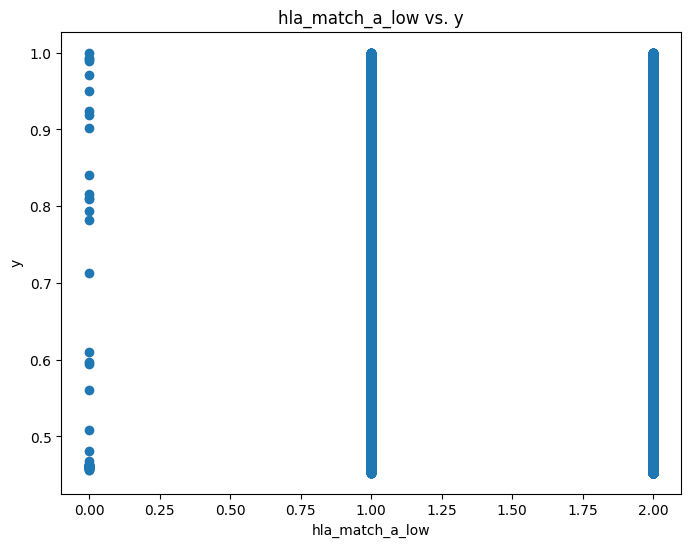

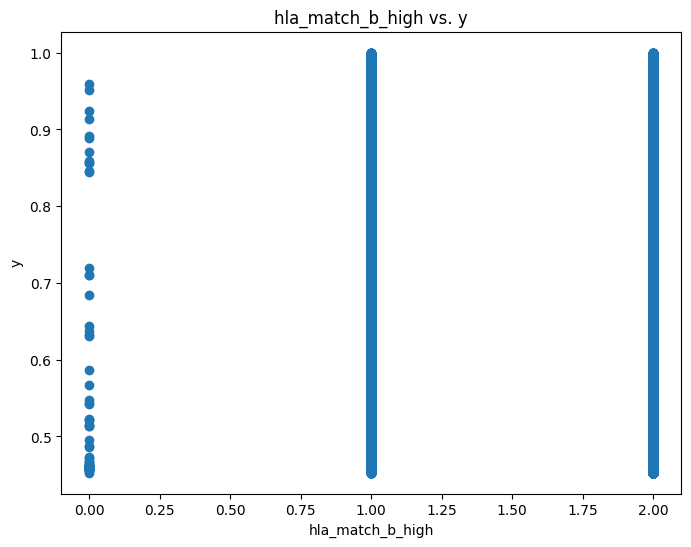

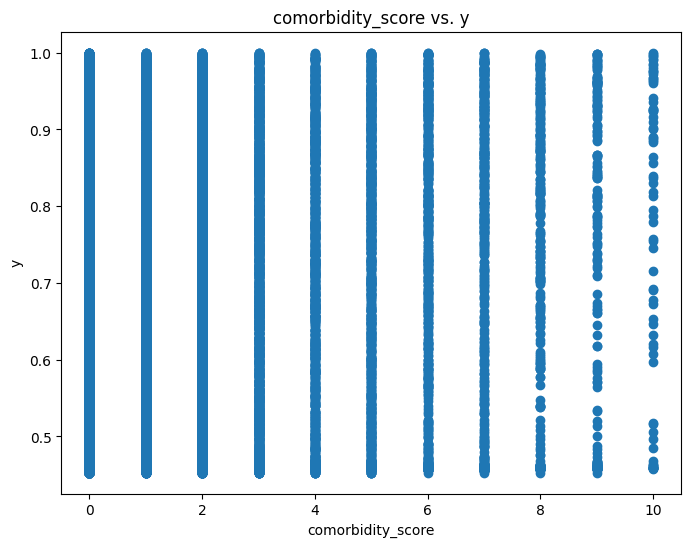

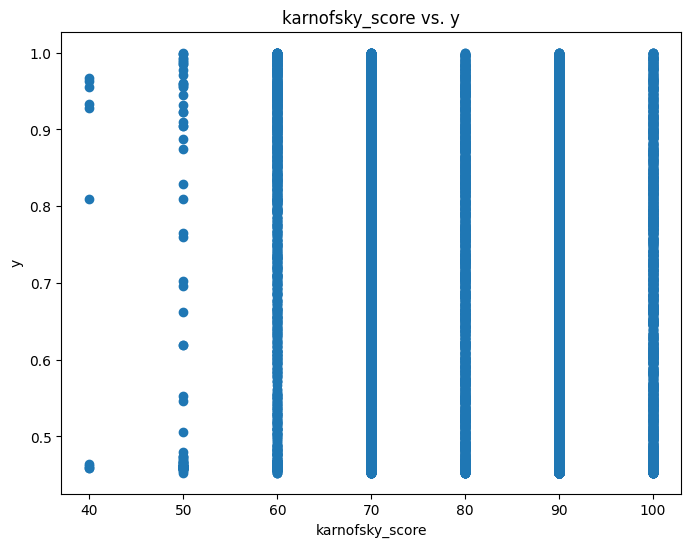

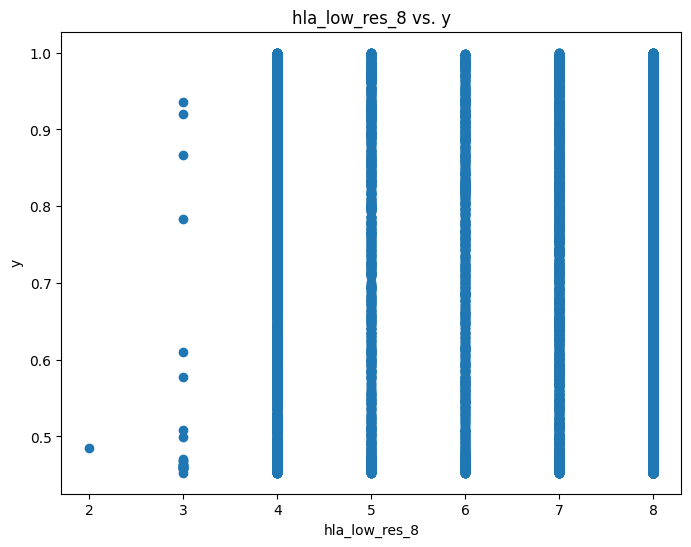

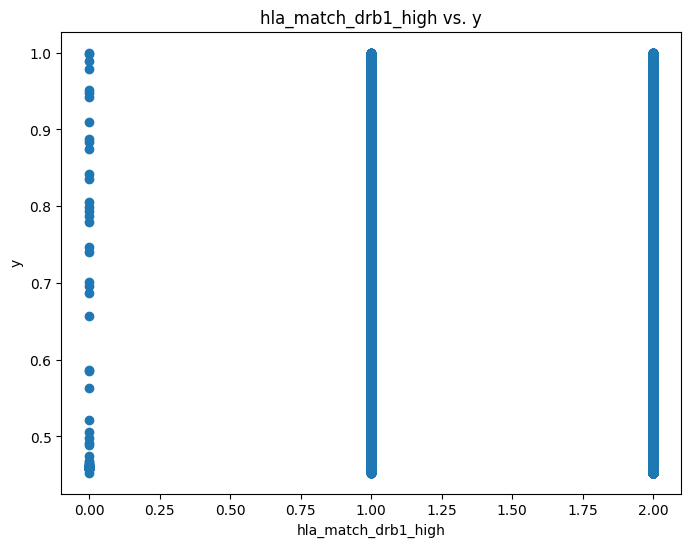

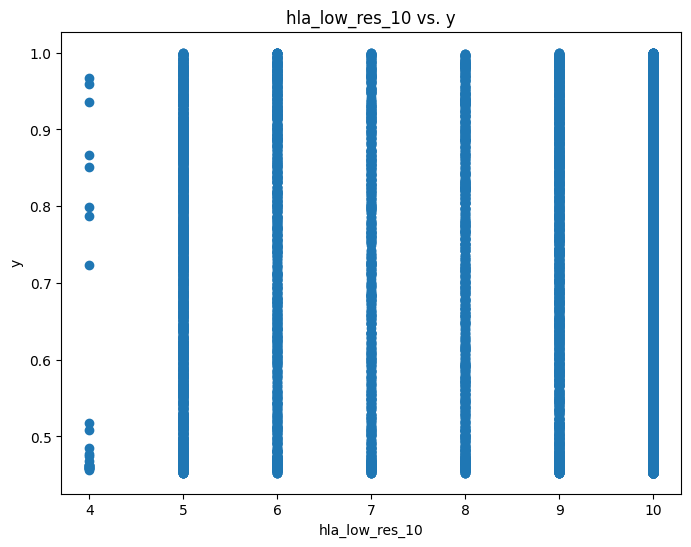

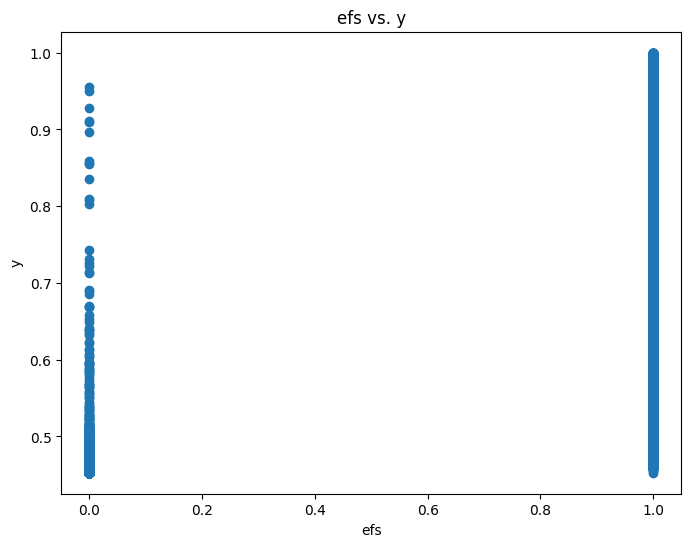

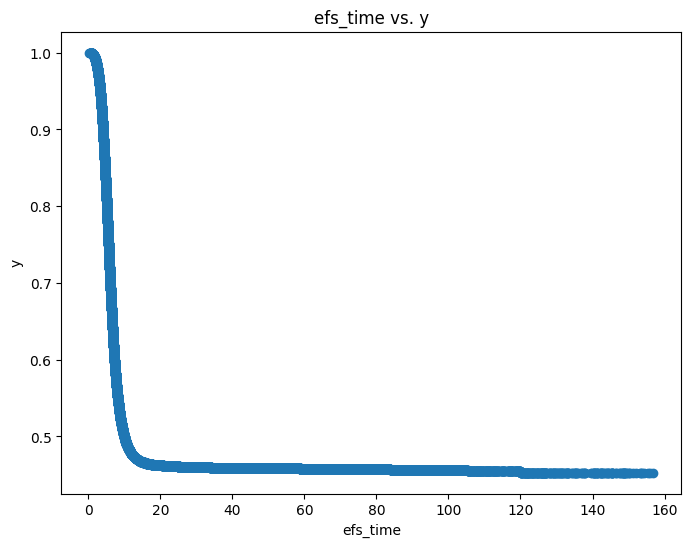

In [ ]:
# prompt: Plot each numeric column against y

for col in df_train.select_dtypes(include=['number']):
    if col != 'y' and col!= 'ID': #and col != 'efs_time':  # Exclude 'y' and 'efs_time'
        plt.figure(figsize=(8, 6))
        plt.scatter(df_train[col], df_train['y'])
        plt.xlabel(col)
        plt.ylabel('y')
        plt.title(f'{col} vs. y')
        plt.show()

In [ ]:
# efs = 1:
# - Indicates censoring.
# - The patient did not experience the event of interest during the observation period (event-free survival at the last follow-up).

# efs = 0:
# - Indicates the event occurred.
# - The patient experienced the event of interest (e.g., relapse, death, or another predefined event) during the observation period.


# efs_time = increase, survival rate (y) = decrease
# More occurence of higher survival rate for efs = 1

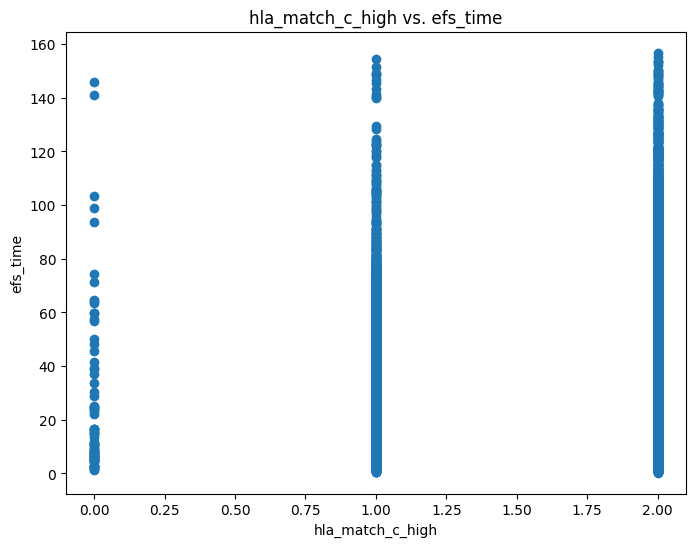

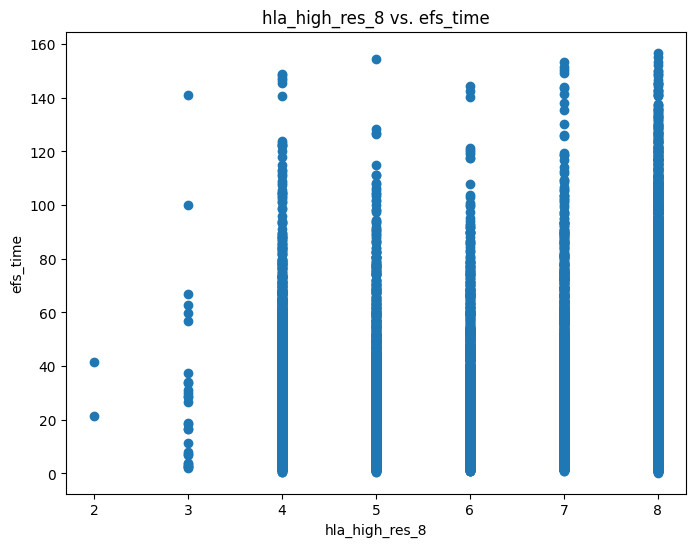

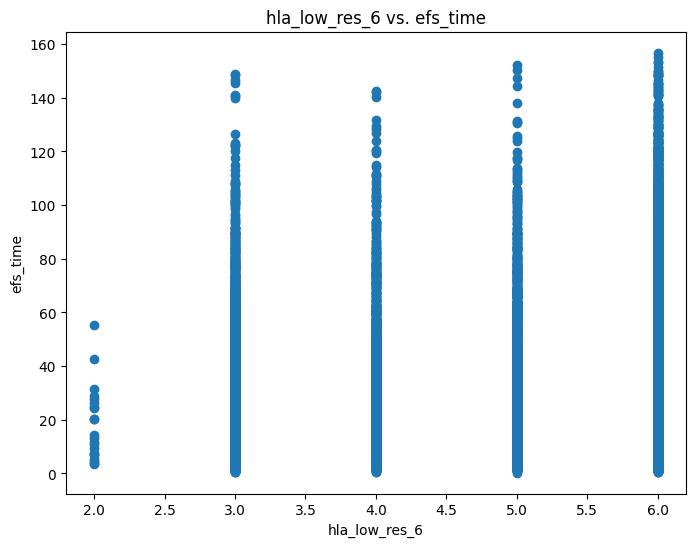

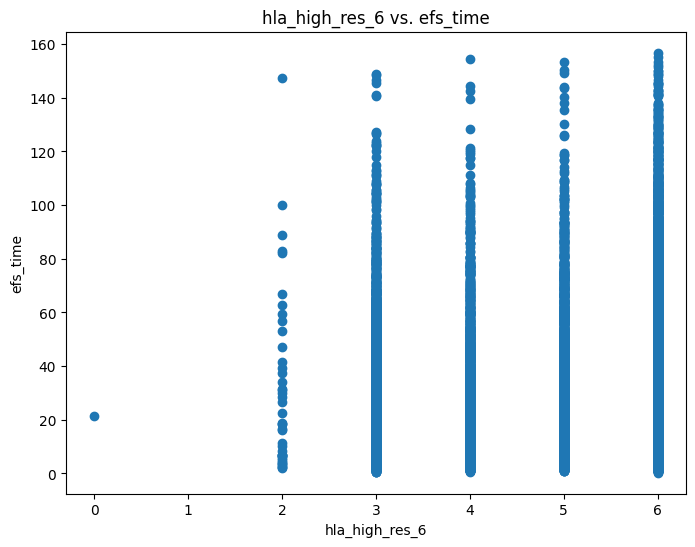

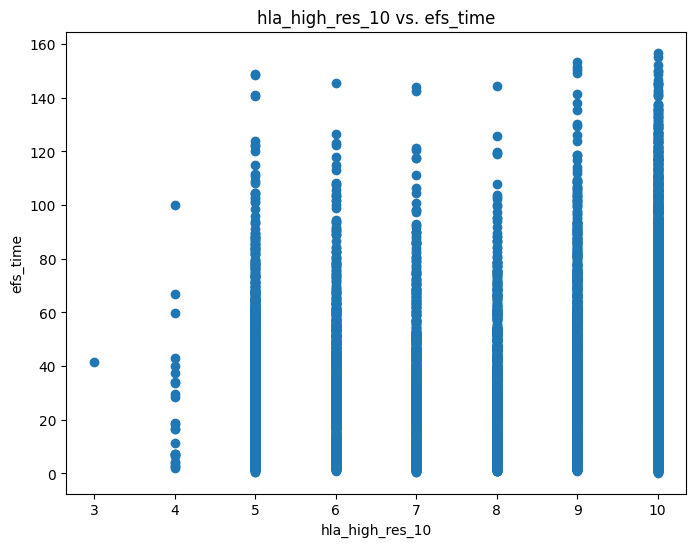

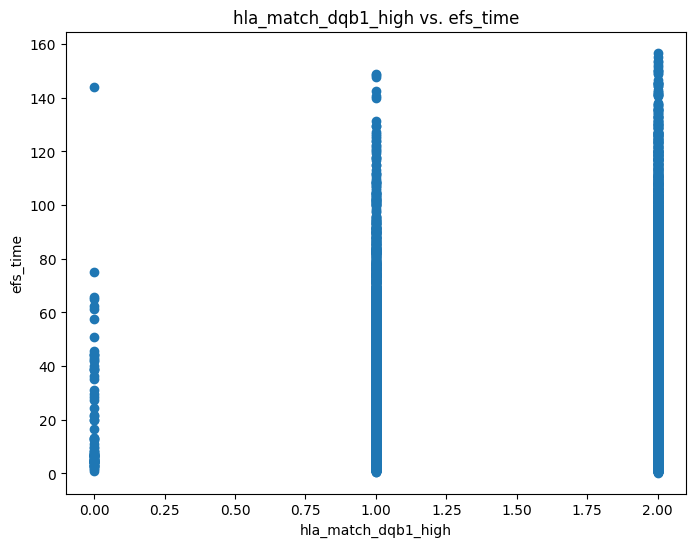

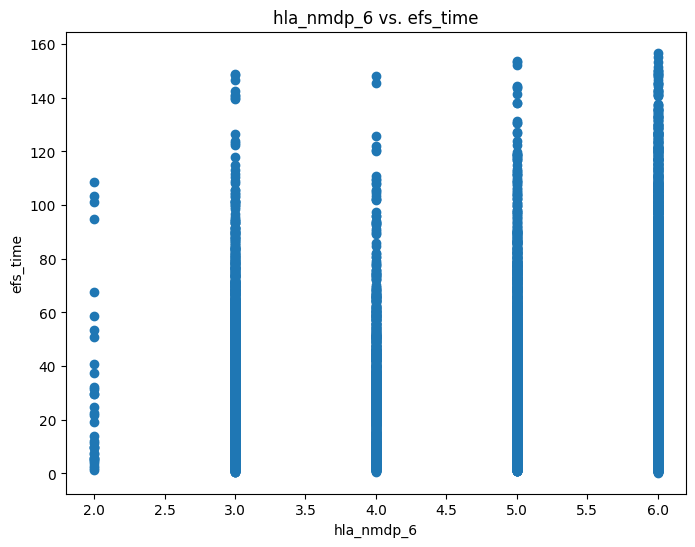

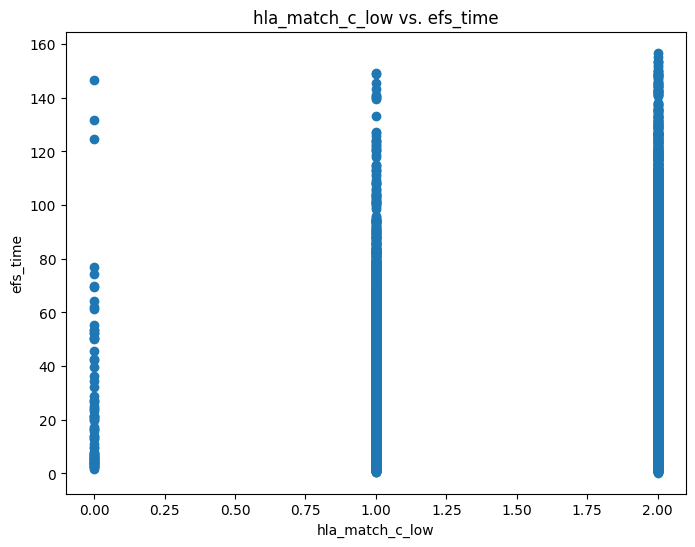

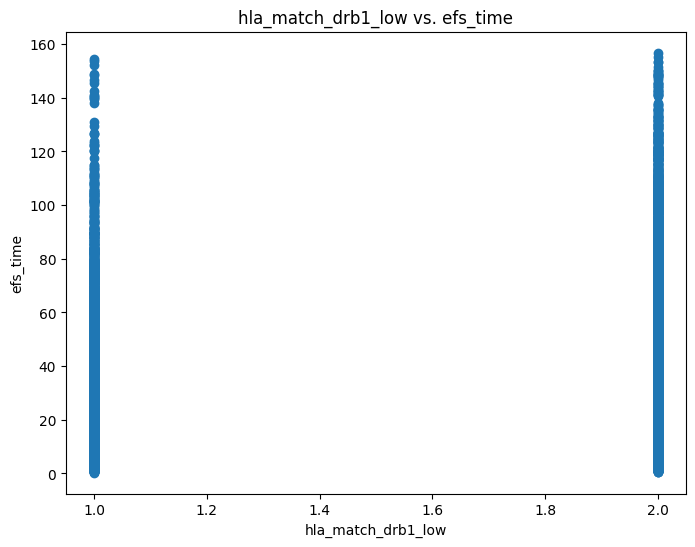

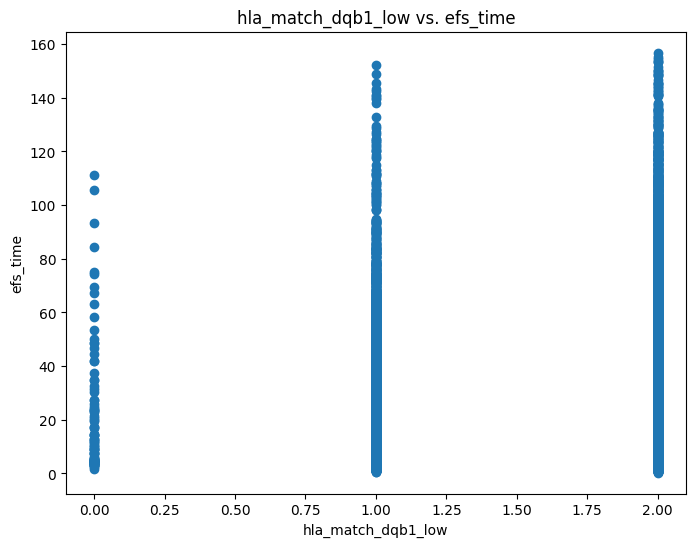

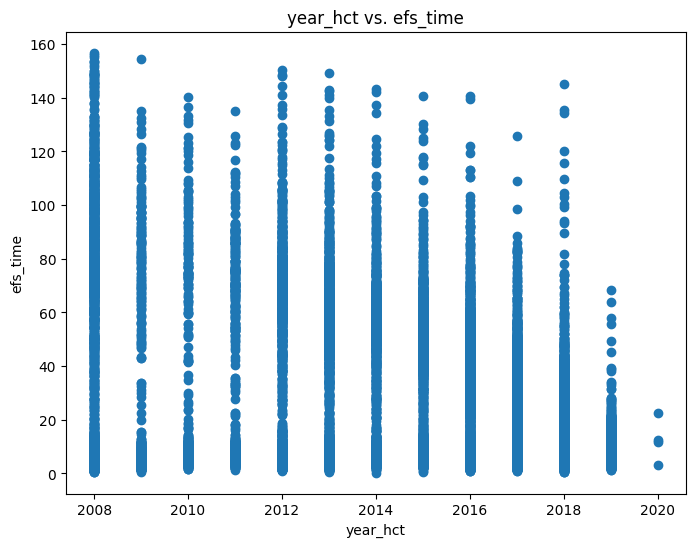

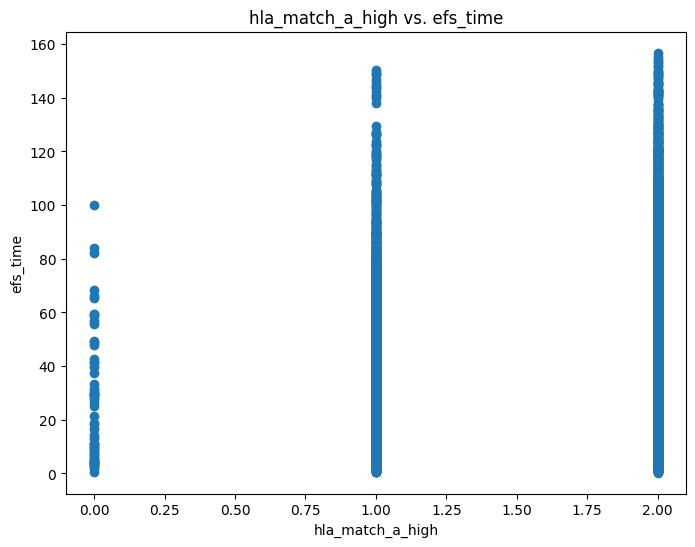

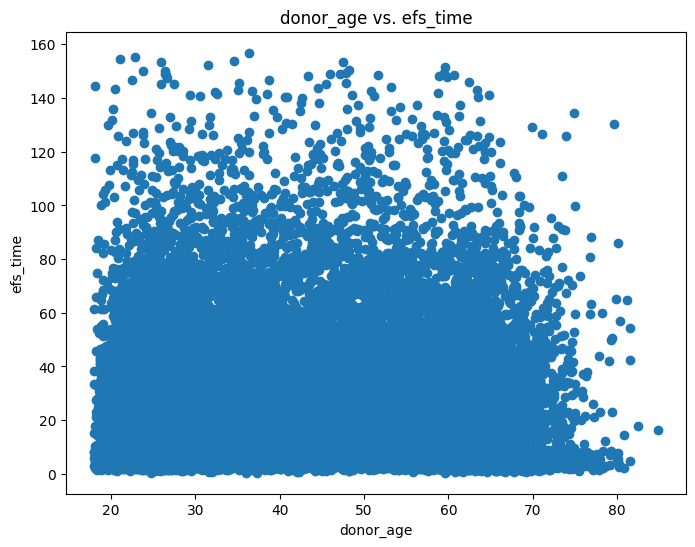

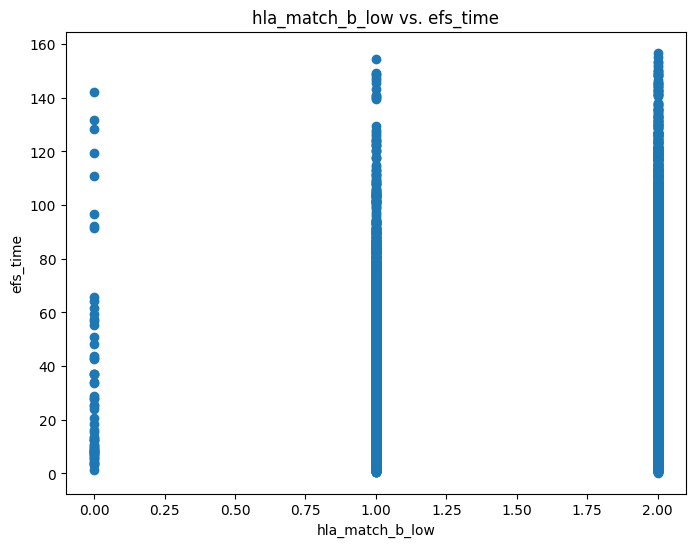

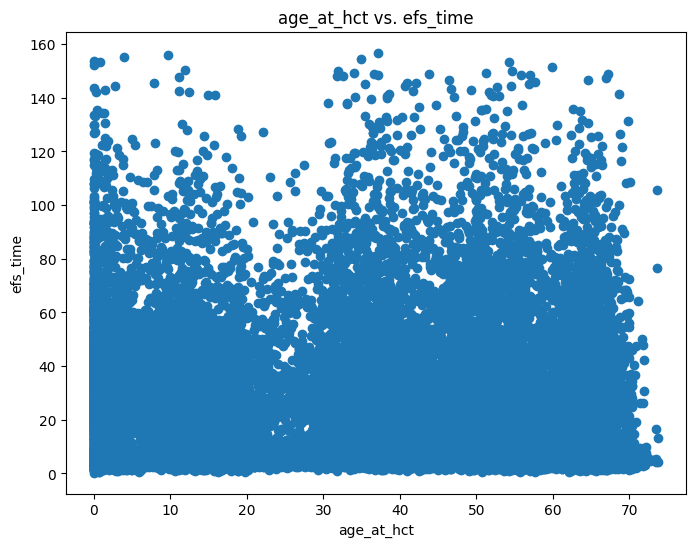

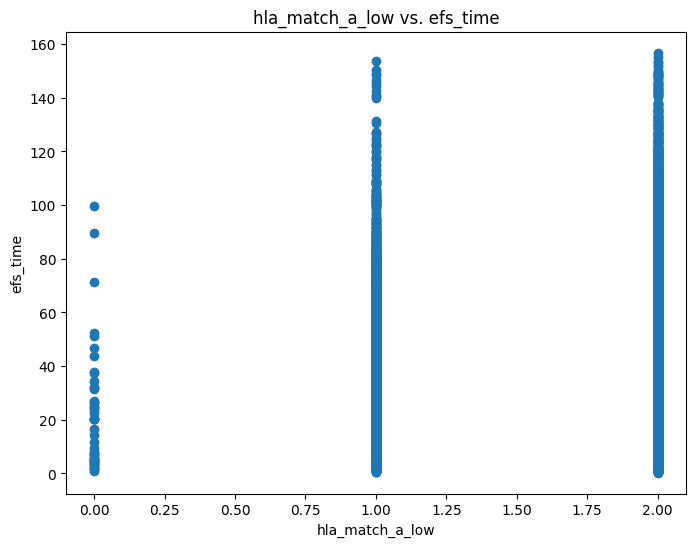

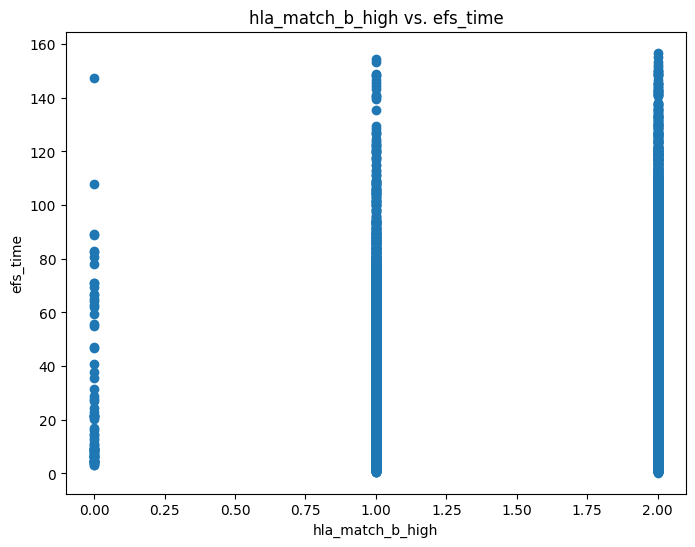

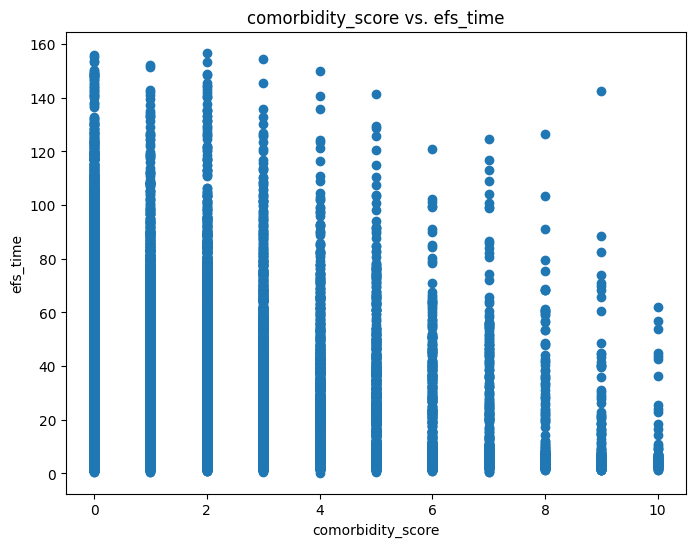

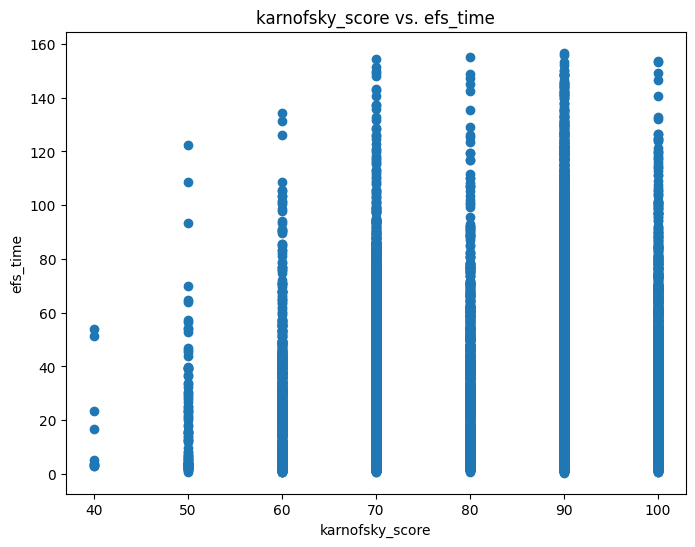

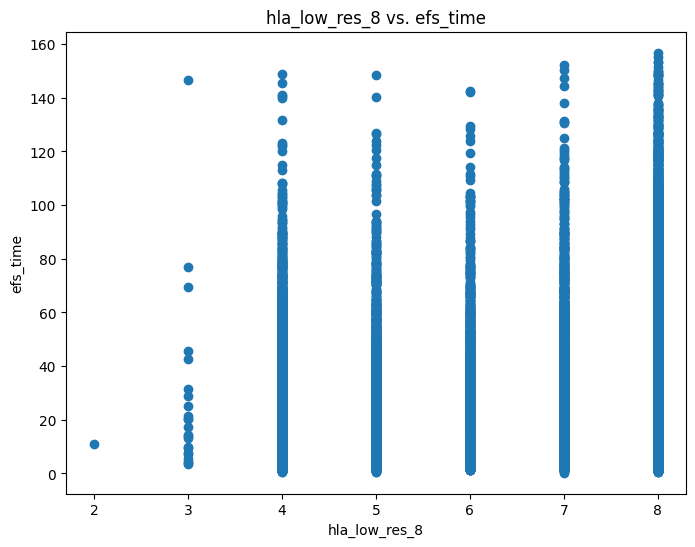

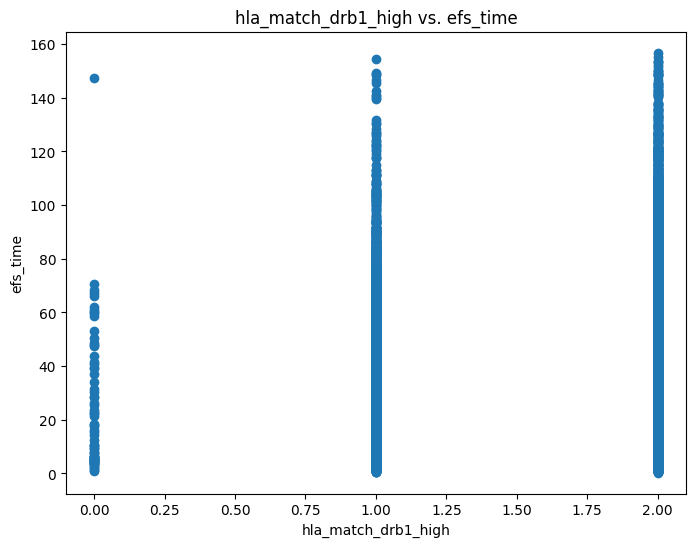

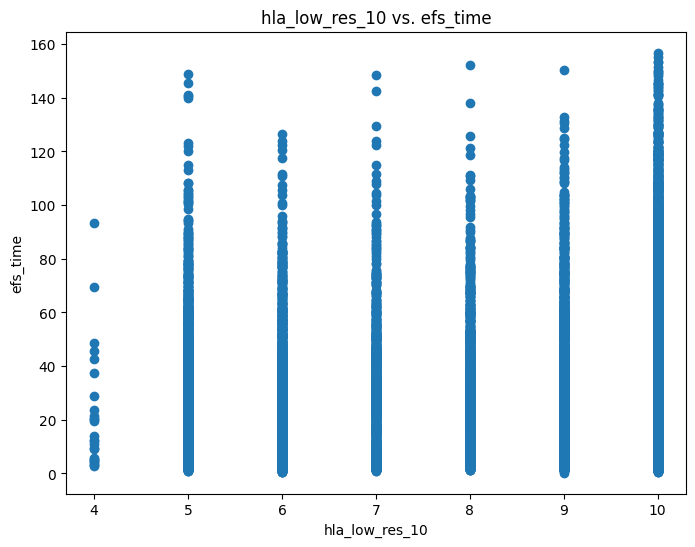

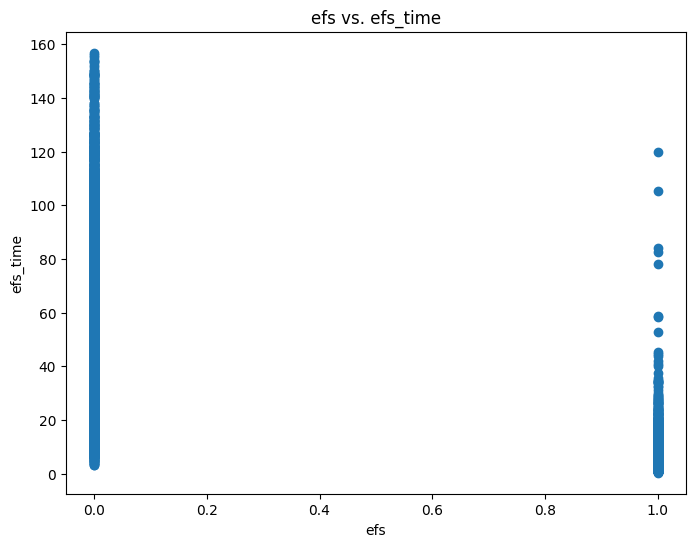

In [ ]:
# Plot each numeric columns against efs_time

for col in df_train.select_dtypes(include=['number']):
    if col != 'efs_time' and col != 'ID' and col != 'y':  # Exclude 'y', 'ID', and 'efs'
        plt.figure(figsize=(8, 6))
        plt.scatter(df_train[col], df_train['efs_time'])
        plt.xlabel(col)
        plt.ylabel('efs_time')
        plt.title(f'{col} vs. efs_time')
        plt.show()

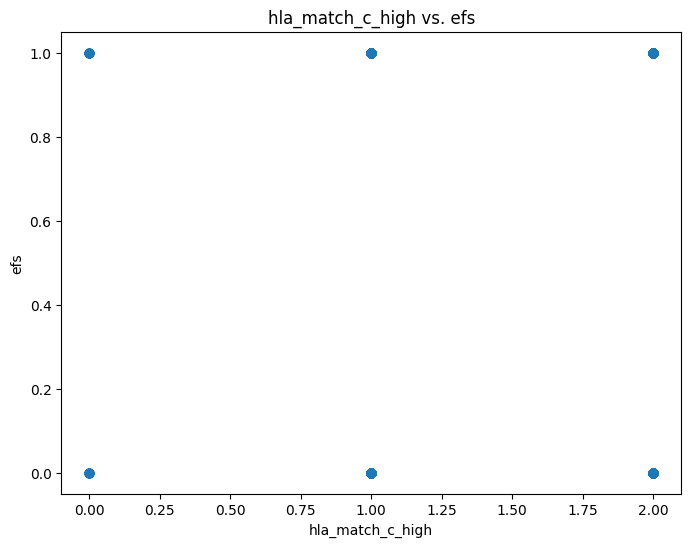

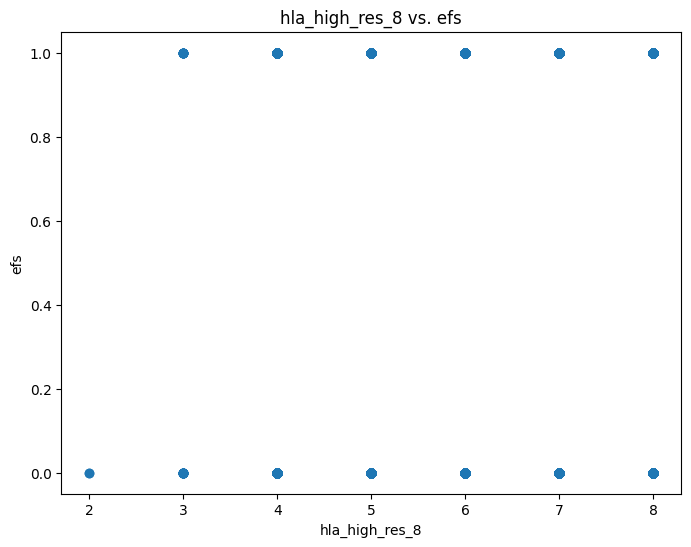

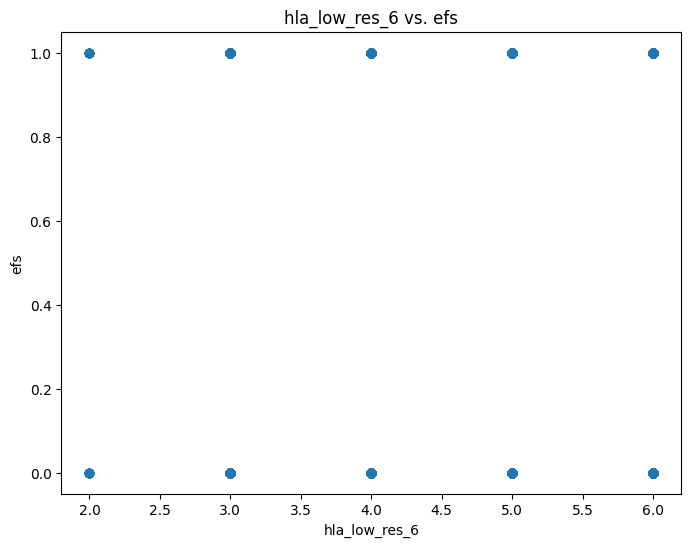

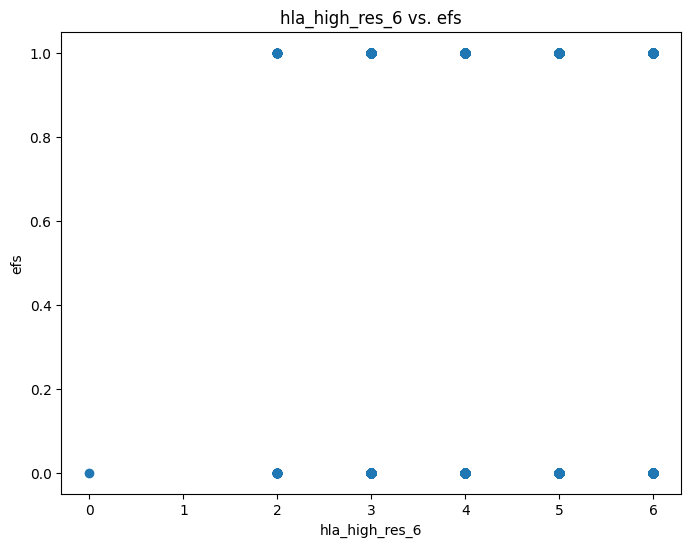

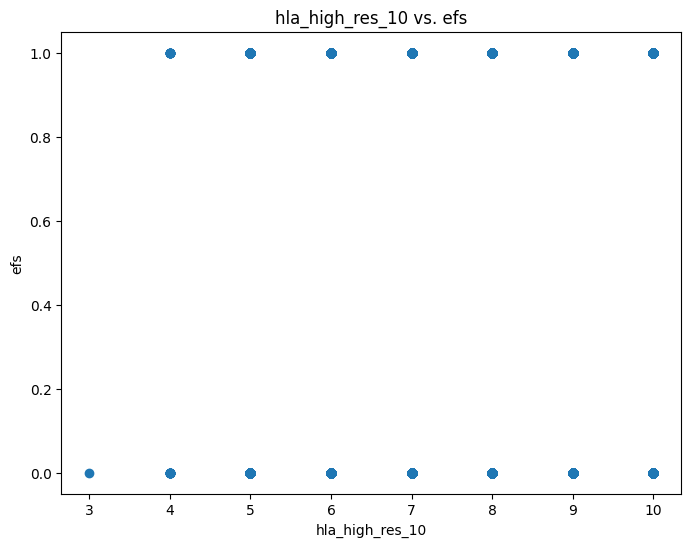

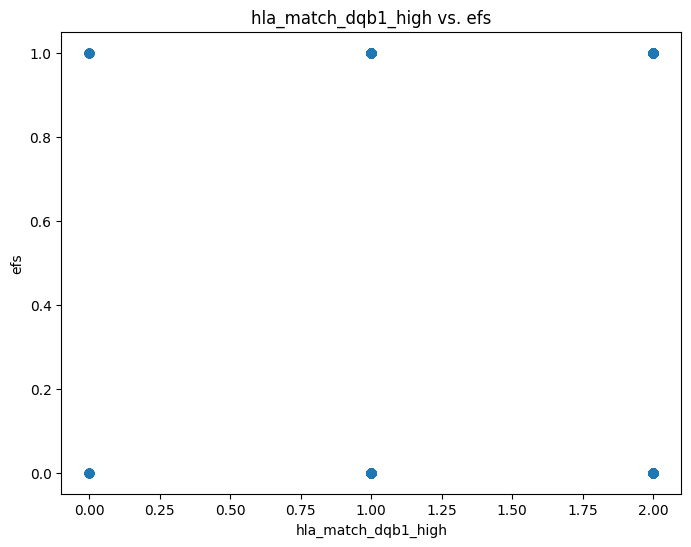

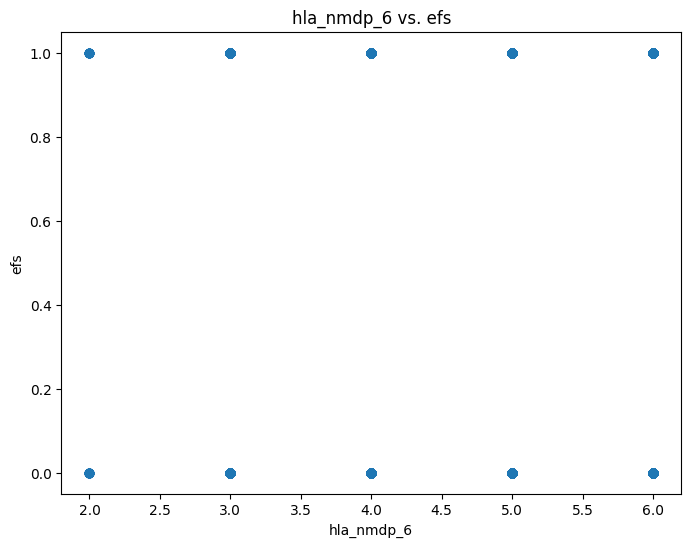

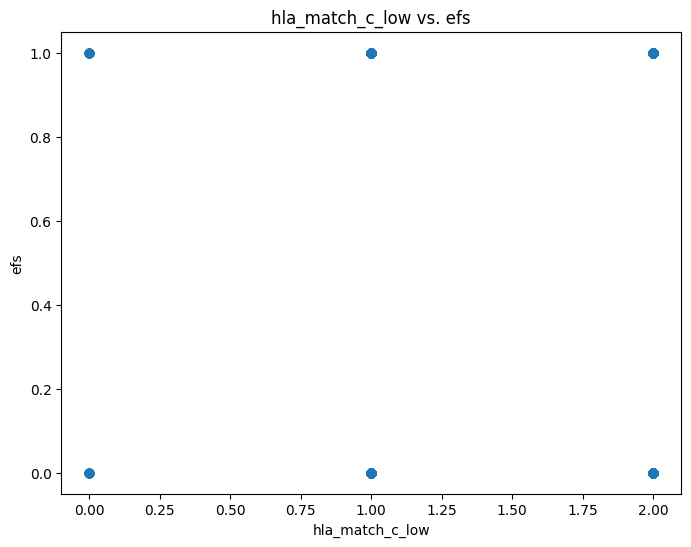

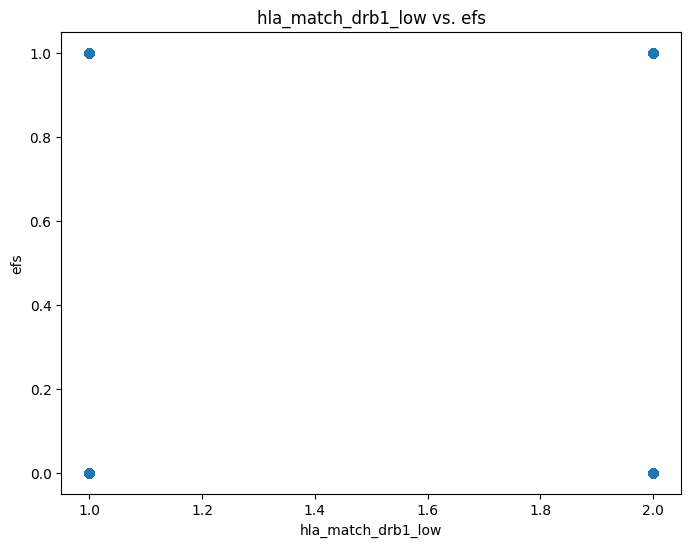

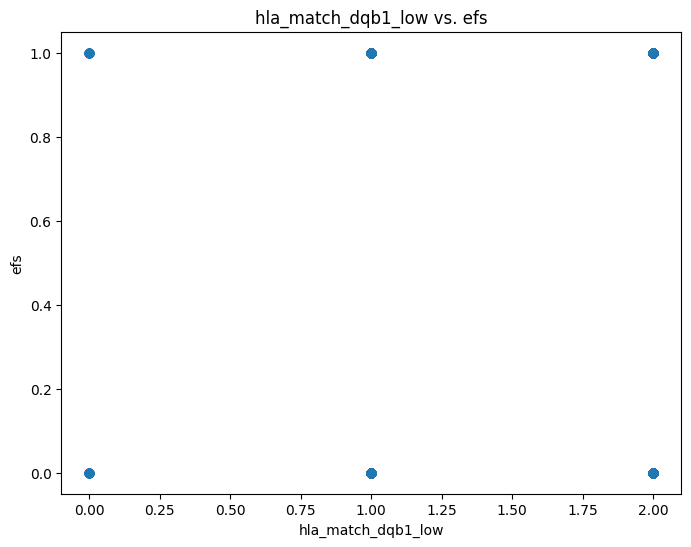

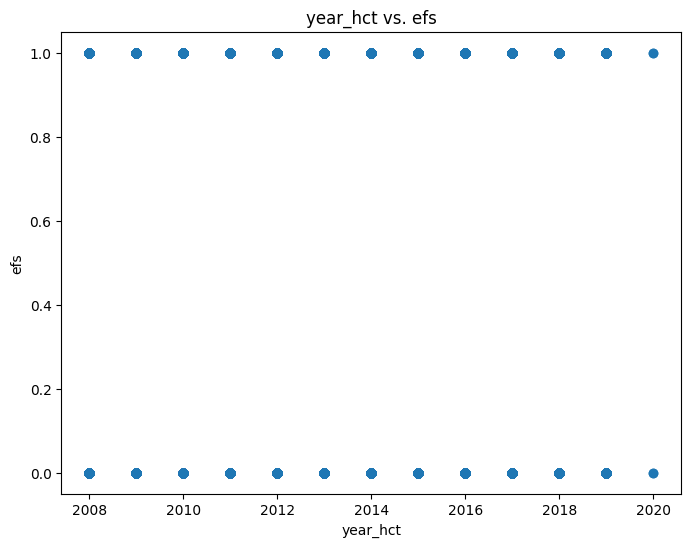

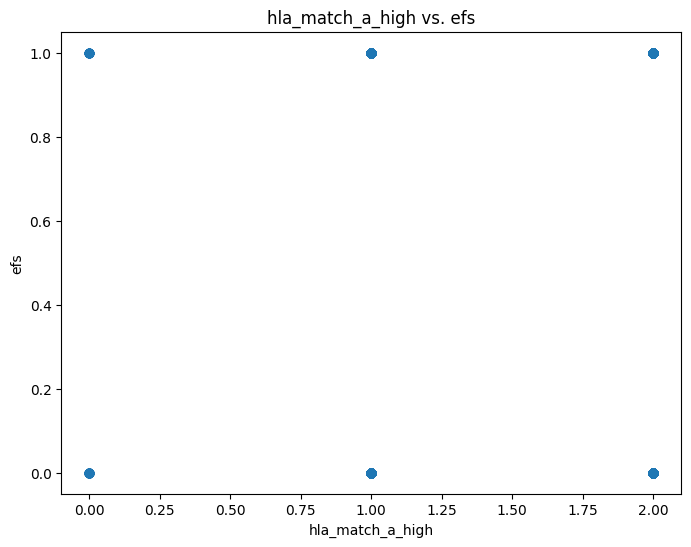

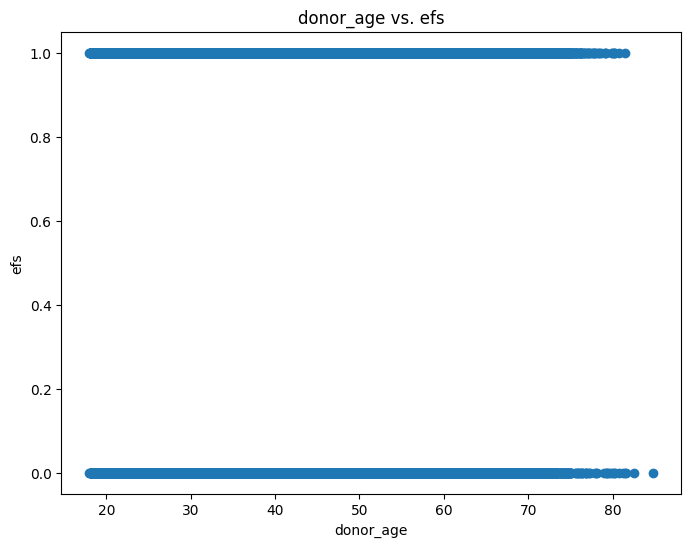

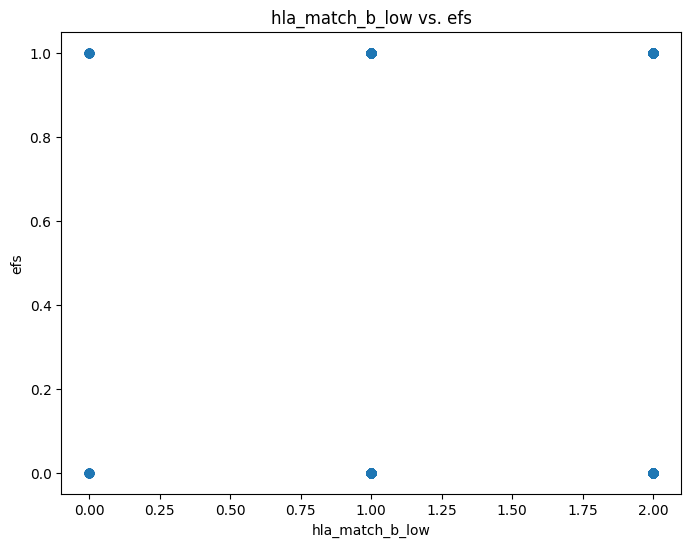

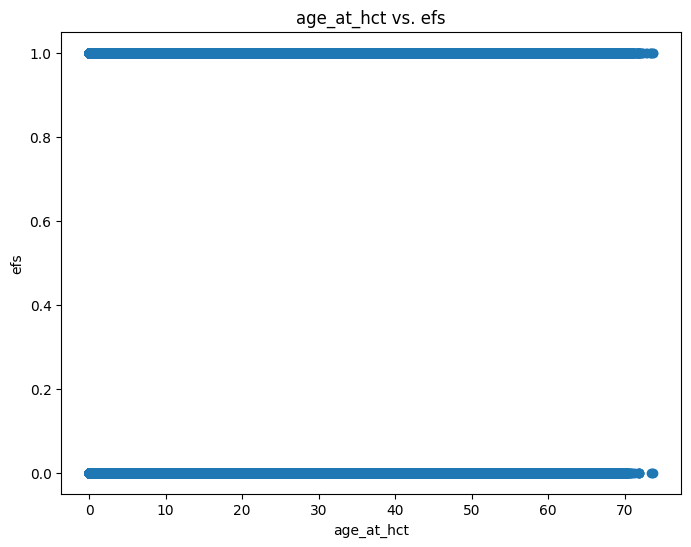

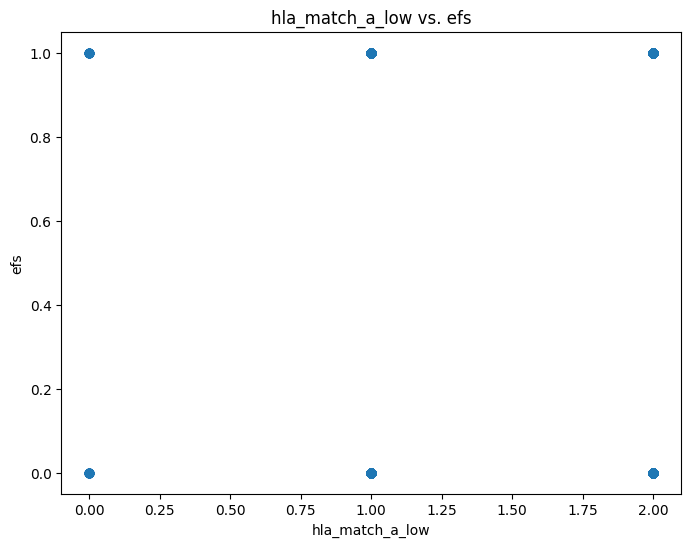

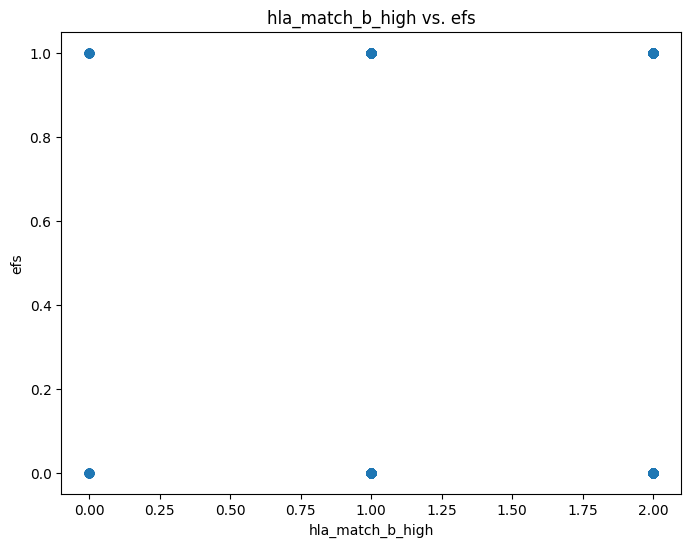

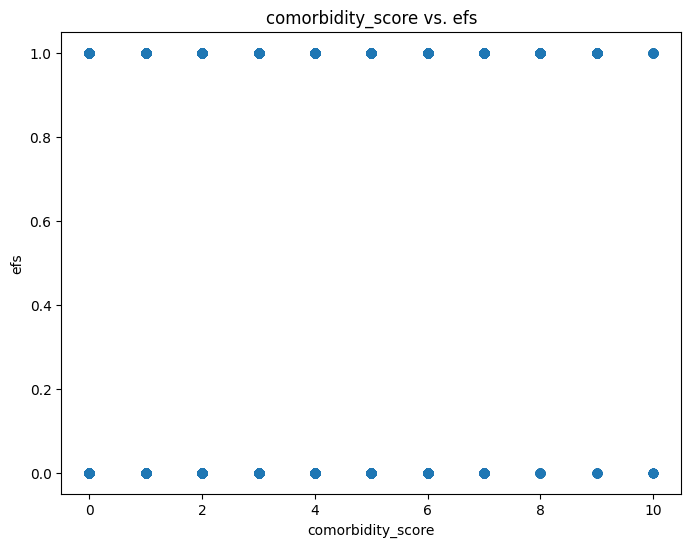

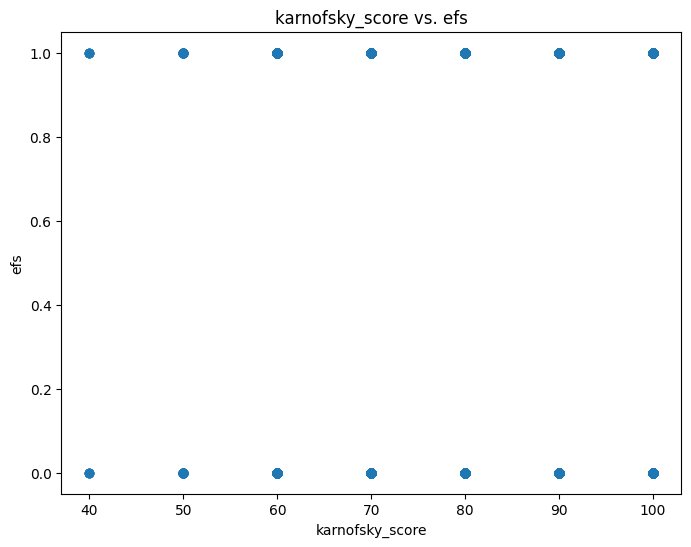

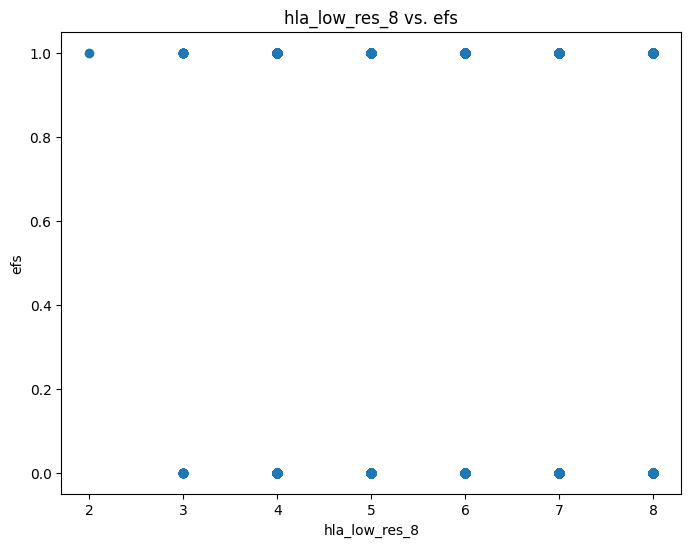

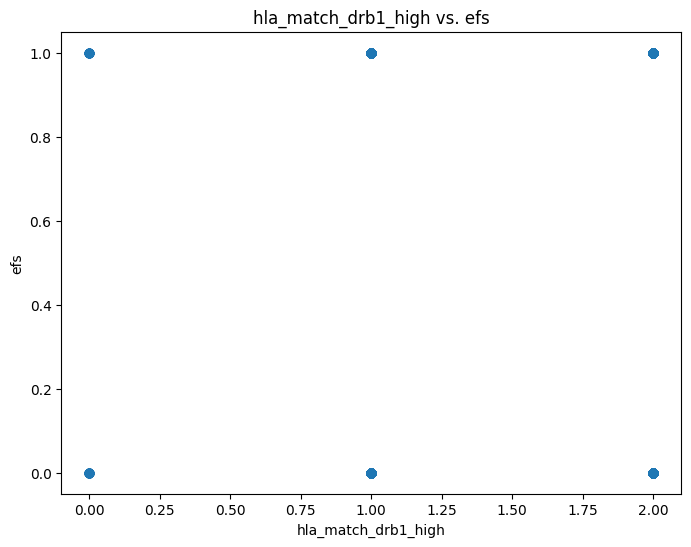

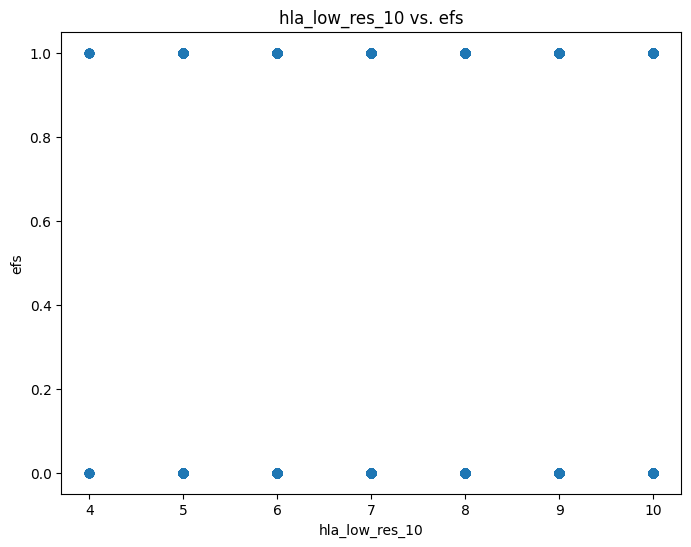

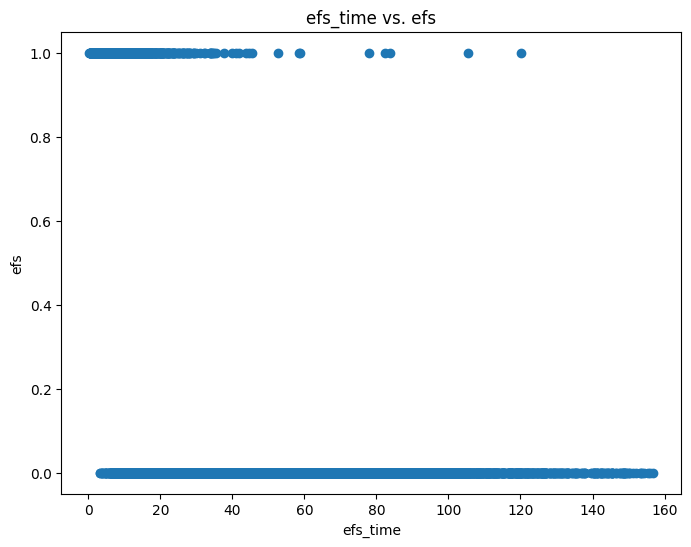

In [ ]:
# Plot each numeric columns against efs

for col in df_train.select_dtypes(include=['number']):
    if col != 'efs' and col != 'ID' and col != 'y':  # Exclude 'y', 'ID', and 'efs_time'
        plt.figure(figsize=(8, 6))
        plt.scatter(df_train[col], df_train['efs'])
        plt.xlabel(col)
        plt.ylabel('efs')
        plt.title(f'{col} vs. efs')
        plt.show()

In [ ]:
df_train

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,hla_match_c_low_cat,hla_match_drb1_low_cat,hla_match_dqb1_low_cat,hla_match_a_high_cat,hla_match_b_low_cat,hla_match_a_low_cat,hla_match_b_high_cat,hla_low_res_8_cat,hla_match_drb1_high_cat,hla_low_res_10_cat
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8.0,2.0,10.0
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8.0,2.0,10.0
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8.0,2.0,10.0
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8.0,2.0,10.0
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8.0,2.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,28795,Intermediate - TED AML case <missing cytogenetics,NaN,Favorable,No,2.0,8.0,No TBI,No,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8.0,2.0,10.0
28796,28796,High,No,Poor,Yes,1.0,4.0,No TBI,No,5.0,...,1.0,2.0,2.0,1.0,1.0,2.0,1.0,6.0,1.0,8.0
28797,28797,TBD cytogenetics,NaN,Poor,NaN,2.0,8.0,No TBI,NaN,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8.0,2.0,10.0
28798,28798,N/A - non-malignant indication,No,Poor,No,1.0,4.0,No TBI,No,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,5.0


In [ ]:
# Count the number of numeric columns

numeric_cols = df_train.select_dtypes(include=['number'])
num_numeric_cols = len(numeric_cols.columns)
print(f"Number of numeric columns: {num_numeric_cols}")

Number of numeric columns: 26


In [ ]:
# Print the unique values for each predictors

for col in df_train.columns:
    print(f"Unique values for {col}:")
    print(df_train[col].unique())
    print("-" * 20)

Unique values for ID:
[    0     1     2 ... 28797 28798 28799]
--------------------
Unique values for dri_score:
['N/A - non-malignant indication' 'Intermediate' 'High' 'Low'
 'N/A - disease not classifiable' 'N/A - pediatric' 'TBD cytogenetics'
 'Intermediate - TED AML case <missing cytogenetics' nan
 'High - TED AML case <missing cytogenetics' 'Very high'
 'Missing disease status']
--------------------
Unique values for psych_disturb:
['No' 'Not done' 'Yes' nan]
--------------------
Unique values for cyto_score:
[nan 'Intermediate' 'Poor' 'Other' 'Favorable' 'TBD' 'Normal' 'Not tested']
--------------------
Unique values for diabetes:
['No' 'Yes' 'Not done' nan]
--------------------
Unique values for hla_match_c_high:
[nan  2.  1.  0.]
--------------------
Unique values for hla_high_res_8:
[nan  8.  7.  5.  6.  4.  3.  2.]
--------------------
Unique values for tbi_status:
['No TBI' 'TBI +- Other, >cGy' 'TBI + Cy +- Other' 'TBI +- Other, <=cGy'
 'TBI +- Other, unknown dose' 'TBI +- 

In [ ]:
# Print unique values for each numeric predictors

for col in df_train.select_dtypes(include=['number']):
    if col not in ['y', 'ID', 'efs_time', 'efs']:
        print(f"Unique values for {col}: {df_train[col].unique()}")
        print("-" * 20)

Unique values for hla_match_c_high: [nan  2.  1.  0.]
--------------------
Unique values for hla_high_res_8: [nan  8.  7.  5.  6.  4.  3.  2.]
--------------------
Unique values for hla_low_res_6: [ 6.  4.  3. nan  5.  2.]
--------------------
Unique values for hla_high_res_6: [ 6.  5.  3. nan  4.  2.  0.]
--------------------
Unique values for hla_high_res_10: [nan 10.  8.  6.  9.  5.  7.  4.  3.]
--------------------
Unique values for hla_match_dqb1_high: [ 2.  1. nan  0.]
--------------------
Unique values for hla_nmdp_6: [ 6.  5.  3. nan  4.  2.]
--------------------
Unique values for hla_match_c_low: [ 2.  1. nan  0.]
--------------------
Unique values for hla_match_drb1_low: [ 2.  1. nan]
--------------------
Unique values for hla_match_dqb1_low: [ 2.  1. nan  0.]
--------------------
Unique values for year_hct: [2016 2008 2019 2009 2018 2015 2017 2010 2012 2014 2013 2011 2020]
--------------------
Unique values for hla_match_a_high: [ 2.  1. nan  0.]
--------------------
Unique 

In [ ]:
# List of predictors to convert to categorical
predictors = [
    'hla_match_c_high', 'hla_high_res_8', 'hla_low_res_6',
    'hla_high_res_6', 'hla_high_res_10', 'hla_match_dqb1_high',
    'hla_nmdp_6', 'hla_match_c_low', 'hla_match_drb1_low',
    'hla_match_dqb1_low', 'hla_match_a_high', 'hla_match_b_low',
    'hla_match_a_low', 'hla_match_b_high', 'hla_low_res_8',
    'hla_match_drb1_high', 'hla_low_res_10'
]

# Create new categorical predictors in df_train and df_test
for col in predictors:
    if col in df_train.columns:
        df_train[f"{col}_cat"] = df_train[col].astype('category').astype(str)
    if col in df_test.columns:
        df_test[f"{col}_cat"] = df_test[col].astype('category').astype(str)

In [ ]:
df_train.dtypes

,0
ID,int64
dri_score,object
psych_disturb,object
cyto_score,object
diabetes,object
...,...
hla_match_a_low_cat,object
hla_match_b_high_cat,object
hla_low_res_8_cat,object
hla_match_drb1_high_cat,object


In [ ]:
df_test.dtypes

,0
ID,int64
dri_score,object
psych_disturb,object
cyto_score,object
diabetes,object
...,...
hla_match_a_low_cat,object
hla_match_b_high_cat,object
hla_low_res_8_cat,object
hla_match_drb1_high_cat,object


# Model

# CatBoost with Kaplan Meier

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.9 MB/s eta 0:00:00


In [ ]:
df_train.isna().sum()

,0
ID,0
dri_score,154
psych_disturb,2062
cyto_score,8068
diabetes,2119
...,...
hla_match_a_low_cat,0
hla_match_b_high_cat,0
hla_low_res_8_cat,0
hla_match_drb1_high_cat,0


In [ ]:
# Use Catboost regressor to predict y

from catboost import CatBoostRegressor #, CatBoostClassifier
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Preprocessing for CatBoost
X = df_train.drop(['ID', 'efs', 'efs_time', 'y'], axis=1)
y = df_train['y']

# Define categorical features
# categorical_features_indices = np.where(X.dtypes != np.float64)[0]
cat_col = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Fill NaN values in categorical features with a string like 'missing'
for col in cat_col:
    X[col] = X[col].fillna('missing').astype(str)  # Replace NaN with 'missing' and ensure string type

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoostRegressor
# model = CatBoostRegressor(iterations=1000, #1000
#                           learning_rate=0.1,
#                           depth=10,
#                           loss_function='RMSE',
#                           random_seed=42,
#                           cat_features=cat_col,
#                           verbose = 100) # Adjust parameters as needed

model = CatBoostRegressor(iterations=1000, #500, 600, 700
                          learning_rate=0.1,
                          depth=6,
                          loss_function='RMSE',
                          random_seed=42,
                          cat_features=cat_col,
                          verbose = 100) # Adjust parameters as needed

# {'depth': 6, 'iterations': 500, 'learning_rate': 0.1, 'loss_function': 'RMSE'}

model.fit(X_train, y_train)

0:	learn: 0.1751027	total: 544ms	remaining: 9m 3s
100:	learn: 0.1557749	total: 28.2s	remaining: 4m 11s
200:	learn: 0.1505717	total: 51.8s	remaining: 3m 25s
300:	learn: 0.1476194	total: 1m 13s	remaining: 2m 51s
400:	learn: 0.1455681	total: 1m 36s	remaining: 2m 23s
500:	learn: 0.1437489	total: 1m 59s	remaining: 1m 59s
600:	learn: 0.1420296	total: 2m 21s	remaining: 1m 33s
700:	learn: 0.1404207	total: 2m 44s	remaining: 1m 10s
800:	learn: 0.1390327	total: 3m 8s	remaining: 46.8s
900:	learn: 0.1374345	total: 3m 30s	remaining: 23.2s
999:	learn: 0.1361104	total: 3m 53s	remaining: 0us


In [ ]:
# Cross-validation score
import numpy as np

y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Root Mean Squared Error on validation set: {rmse}")

# 0.15804613430615347 (Baseline) #Have data leakage

# 0.15610465675641322
# 0.155431443543045 (With gridsearchCV) (iterations=500)
# 0.1552908231366124 (iterations=600)
# 0.1552000007744207 (iterations=700)
# 0.154925666980595 (iterations=1000)

# With cat features
# 0.15466325096626116

Root Mean Squared Error on validation set: 0.15466325096626116


In [ ]:
# Get the indices of X_val
val_indices = X_val.index

# Retrieve the rows from df_train corresponding to X_val
df_val = df_train.loc[val_indices]


y_true = df_val[["ID","efs","efs_time","race_group"]].copy()
y_pred_val = df_val[["ID"]].copy()
y_pred_val["prediction"] = y_pred

m = score(y_true.copy(), y_pred_val.copy(), "ID")
print(f"\nOverall CV for CatBoost KaplanMeier =",m)

# Stratified C-index:
# 0.6643339377522818
# 0.6724293319637831
# 0.6732198108699261 (iterations=1000)

In [ ]:
# Predict on the test set
X_test = df_test.drop('ID', axis=1)

y_pred_test = model.predict(X_test)
y_pred_test

In [ ]:
sub = pd.read_csv("/kaggle/input/equity-post-HCT-survival-predictions/sample_submission.csv")
sub.prediction = y_pred_test

sub.to_csv("submission.csv",index=False)
print("Sub shape:",sub.shape)
sub.head()

# Submission score:
# 0.671
# 0.673
#

In [ ]:
# Get feature importance
feature_importances = model.get_feature_importance()
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

# Print feature importance
# print("Feature Importances:")
# for name, importance in zip(feature_names, feature_importances):
#     print(f"{name}: {importance:.4f}")

# Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in CatBoost Regressor")
plt.gca().invert_yaxis()
plt.show()

# Kaplan Meier

<Axes: xlabel='timeline'>

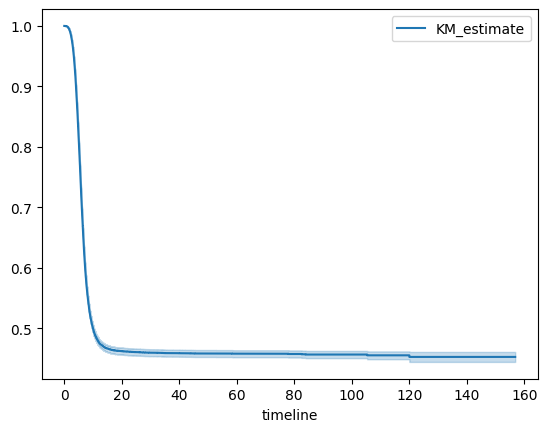

In [ ]:
from lifelines import KaplanMeierFitter
import pandas as pd

# Kaplan-Meier Estimator
kmf = KaplanMeierFitter()
kmf.fit(df_train['efs_time'], event_observed=df_train['efs'])

# Plot survival curve
kmf.plot_survival_function()

In [ ]:
# kmf_0 = KaplanMeierFitter()
# kmf_1 = KaplanMeierFitter()

# # Split data by treatment group
# mask_0 = (df['treatment'] == 0)
# mask_1 = (df['treatment'] == 1)

# kmf_0.fit(df[mask_0]['duration'], event_observed=df[mask_0]['event'], label='Treatment=0')
# kmf_1.fit(df[mask_1]['duration'], event_observed=df[mask_1]['event'], label='Treatment=1')

# # Plot
# ax = kmf_0.plot_survival_function()
# kmf_1.plot_survival_function(ax=ax)
# plt.title("Kaplan–Meier by Treatment Group")
# plt.xlabel("Time")
# plt.ylabel("Survival Probability")
# plt.show()

# Cox

In [ ]:
# Encode object type columns

In [ ]:
from lifelines import CoxPHFitter

# Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(df_train, duration_col='efs_time', event_col='efs')
cph.print_summary()  # View summary statistics

# Plot hazard ratios
cph.plot()


In [ ]:
from lifelines import CoxPHFitter

# Prepare the data for CoxPHFitter
# lifelines expects a "duration_col" and "event_col", plus any covariates
cph_df = df.copy()  # In practice, you'd choose the relevant covariates

# Initialize the Cox PH model
cph = CoxPHFitter()

# Fit the Cox model
cph.fit(cph_df, duration_col='duration', event_col='event', show_progress=False)
print("Cox PH Model Summary:")
cph.print_summary()  # displays the coefficients, p-values, etc.

# Plot partial effects on survival
cph.plot_partial_effects_on_outcome(
    covariates={'age': [40, 60]},
    values=[0, 1],  # or you could fix other covariates here
    plot_baseline=False
)
plt.title("Partial Effect of Age (Example)")
plt.show()


In [ ]:
cph.check_assumptions(cph_df, show_plots=True)


# Weibull

Weibull shape parameter (rho): 0.6380174305143571
Weibull scale parameter (lambda): 50.891612849348945


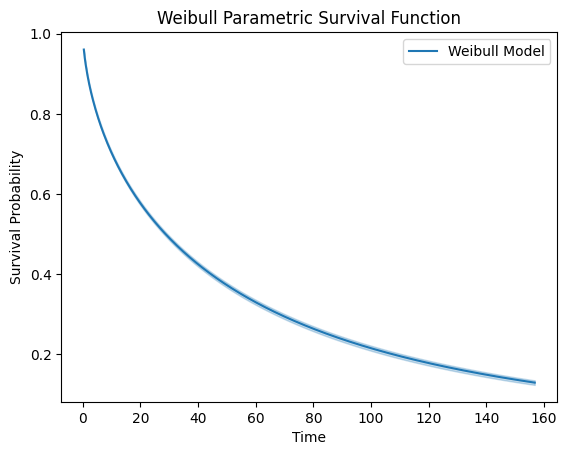

In [ ]:
from lifelines import WeibullFitter
import matplotlib.pyplot as plt

# Initialize the Weibull fitter
weibull_fitter = WeibullFitter()

# Fit the data
weibull_fitter.fit(df_train['efs_time'], event_observed=df_train['efs'], label='Weibull Model')

# Print the fitted parameters
print("Weibull shape parameter (rho):", weibull_fitter.rho_)
print("Weibull scale parameter (lambda):", weibull_fitter.lambda_)

# Plot survival function
weibull_fitter.plot_survival_function()
plt.title("Weibull Parametric Survival Function")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()


Exponential rate parameter (lambda): 43.088183636678075


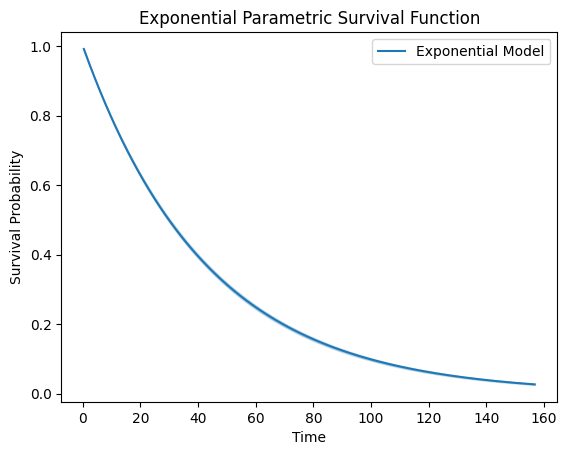

In [ ]:
# Using ExponentialFitter

from lifelines import ExponentialFitter

# Initialize the Exponential fitter
exponential_fitter = ExponentialFitter()

# Fit the data
exponential_fitter.fit(df_train['efs_time'], event_observed=df_train['efs'], label='Exponential Model')

# Print the fitted parameters
print("Exponential rate parameter (lambda):", exponential_fitter.lambda_)

# Plot survival function
exponential_fitter.plot_survival_function()
plt.title("Exponential Parametric Survival Function")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()

LogNormal mu parameter: 3.1916323597688794
LogNormal sigma parameter: 1.7587608762948121


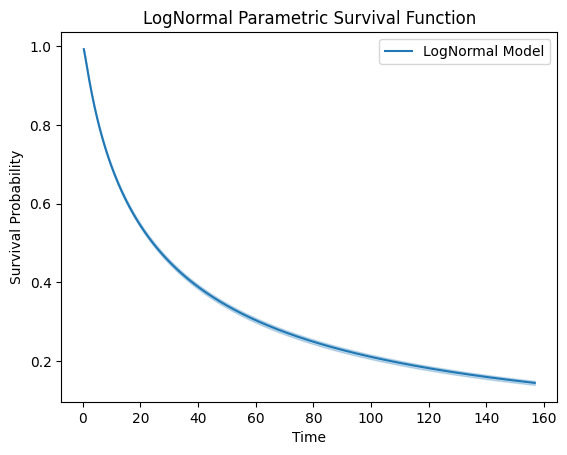

In [ ]:
# Using LogNormalFitter

from lifelines import LogNormalFitter

# Initialize the LogNormal fitter
lognormal_fitter = LogNormalFitter()

# Fit the data
lognormal_fitter.fit(df_train['efs_time'], event_observed=df_train['efs'], label='LogNormal Model')

# Print the fitted parameters
print("LogNormal mu parameter:", lognormal_fitter.mu_)
print("LogNormal sigma parameter:", lognormal_fitter.sigma_)

# Plot survival function
lognormal_fitter.plot_survival_function()
plt.title("LogNormal Parametric Survival Function")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()

LogLogistic alpha parameter: 21.495375190602573
LogLogistic beta parameter: 0.9090976737162779


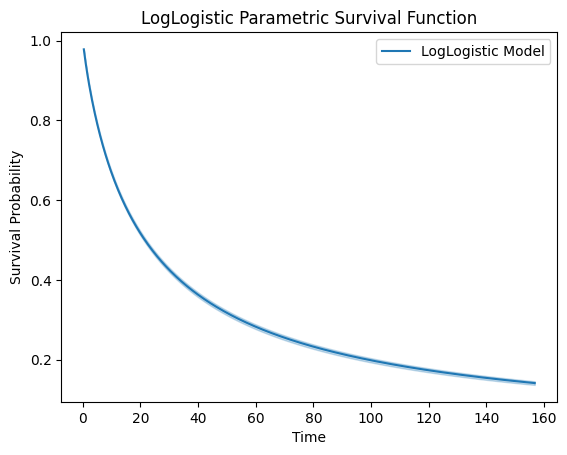

In [ ]:
# Using LogLogisticFitter

from lifelines import LogLogisticFitter

# Initialize the LogLogistic fitter
loglogistic_fitter = LogLogisticFitter()

# Fit the data
loglogistic_fitter.fit(df_train['efs_time'], event_observed=df_train['efs'], label='LogLogistic Model')

# Print the fitted parameters
print("LogLogistic alpha parameter:", loglogistic_fitter.alpha_)
print("LogLogistic beta parameter:", loglogistic_fitter.beta_)

# Plot survival function
loglogistic_fitter.plot_survival_function()
plt.title("LogLogistic Parametric Survival Function")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()

# AFT

In [ ]:
from lifelines import WeibullAFTFitter

aft = WeibullAFTFitter()
aft.fit(cph_df, duration_col='duration', event_col='event')
print("Weibull AFT Model Summary:")
aft.print_summary()

# You can also predict survival function for given covariates
predicted_sf = aft.predict_survival_function(cph_df.iloc[[0, 1, 2]])  # for first 3 observations
predicted_sf.plot()
plt.title("Weibull AFT Predicted Survival Functions")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()


In [ ]:
# from lifelines import CumulativeIncidenceFitter

# # Example dataset with competing events
# # data = pd.DataFrame({
# #     'time': [5, 6, 6, 2, 4, 8],
# #     'event': [1, 2, 1, 1, 0, 2],  # 1 = event A, 2 = event B, 0 = censored
# #     'age': [34, 45, 23, 55, 40, 60]
# # })

# # Separate the events
# event_a = (df_train['efs'] == 0)
# event_b = (df_train['efs'] == 1)

# # Competing Risks Model
# cif = CumulativeIncidenceFitter()

# # Event A
# cif.fit(df_train['efs_time'], event_observed=event_a, label="Event A")
# ax = cif.plot()

# # Event B
# cif.fit(df_train['efs_time'], event_observed=event_b, label="Event B")
# cif.plot(ax=ax)
